# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [473]:
# if plotnine is not installed in Jupter then use the following command to install it 


Running this project require the following imports 

In [474]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse
import scipy.stats as stats
from sklearn.metrics import silhouette_score 
import sklearn.metrics as ms
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [475]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,num_clusters):
    color = 'brgcmykwd'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        k = 'k'+ str(num_clusters)
        for i in range(num_clusters):
#            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
#            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)
            df = X[X[k]==i]
            plt.scatter(df['x'],df['y'],c = color[i], alpha = alpha,s=s)
            plt.title(k)


## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



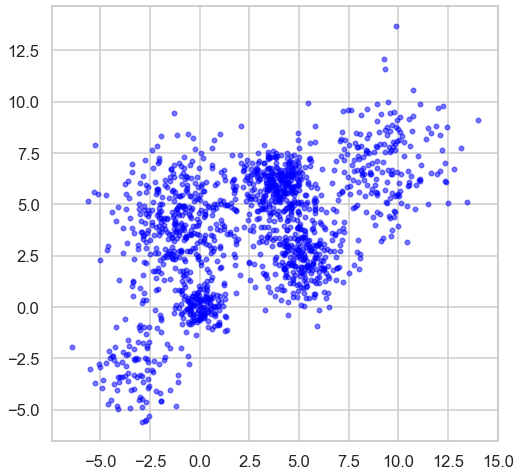

In [476]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data,0)

## change format of the data set to be a data frame

In [477]:
Multi_blob_Data_df1=pd.DataFrame(Multi_blob_Data, columns=list('xy'))
Multi_blob_Data_df1

x          y
0     -2.354272  -3.179744
1     -2.158005  -1.020061
2     -3.304399  -3.304378
3     -0.947023  -2.002335
4     -3.610317  -2.294672
...         ...        ...
1445   9.240137   3.378037
1446  10.305952   7.366174
1447   9.864057  13.674604
1448   5.457008   9.931984
1449   8.511339   7.488459

[1450 rows x 2 columns]

In [478]:
Multi_blob_best_silhouette_scores=[]
Multi_blob_best_references=[]

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

In [479]:
# k = 4 , 5 ,6 ,7 ,8
Multi_blob_Data_df=Multi_blob_Data_df1.copy()
k4 = KMeans(4).fit_predict(Multi_blob_Data_df[['x','y']])
Multi_blob_Data_df['k4']=k4
k5=KMeans(5).fit_predict(Multi_blob_Data_df[['x','y']])
Multi_blob_Data_df['k5']=k5
k6=KMeans(6).fit_predict(Multi_blob_Data_df[['x','y']])
Multi_blob_Data_df['k6']=k6
k7=KMeans(7).fit_predict(Multi_blob_Data_df[['x','y']])
Multi_blob_Data_df['k7']=k7
k8=KMeans(8).fit_predict(Multi_blob_Data_df[['x','y']])
Multi_blob_Data_df['k8']=k8
Multi_blob_Data_df

x          y  k4  k5  k6  k7  k8
0     -2.354272  -3.179744   3   1   4   3   5
1     -2.158005  -1.020061   3   1   4   3   5
2     -3.304399  -3.304378   3   1   4   3   5
3     -0.947023  -2.002335   3   1   4   3   5
4     -3.610317  -2.294672   3   1   4   3   5
...         ...        ...  ..  ..  ..  ..  ..
1445   9.240137   3.378037   2   3   3   4   0
1446  10.305952   7.366174   2   3   3   4   7
1447   9.864057  13.674604   2   3   3   4   7
1448   5.457008   9.931984   2   2   0   5   2
1449   8.511339   7.488459   2   3   3   4   7

[1450 rows x 7 columns]

In [480]:
# #testing k4
# df1 = Multi_blob_Data_df[Multi_blob_Data_df['k4']==0]
# df2 = Multi_blob_Data_df[Multi_blob_Data_df['k4']==1]
# df3 = Multi_blob_Data_df[Multi_blob_Data_df['k4']==2]
# df4 = Multi_blob_Data_df[Multi_blob_Data_df['k4']==3]
# plt.scatter(df1['x'],df1['y'],c = 'b', marker = 'x', s = 100)
# plt.scatter(df2['x'],df2['y'],c = 'r', marker = 'x', s = 100)
# plt.scatter(df3['x'],df3['y'],c = 'g', marker = 'x', s = 100)
# plt.scatter(df4['x'],df4['y'],c = 'y', marker = 'x', s = 100)


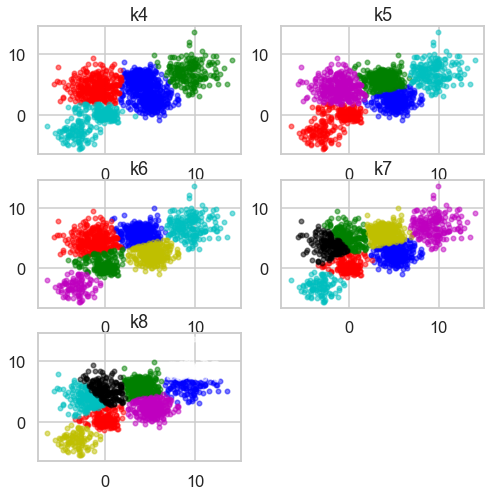

In [481]:
#applying display_cluster for each k value
l = 1
k = [4,5,6,7,8]
plt.figure()
for i in k :
    plt.subplot(320+l)
    display_cluster(Multi_blob_Data_df,i)
    l = l+1


In [482]:
#plot distortion function versus K --> K value at the elbow is better to choose 
def distortion_function(k,df):
    y=[]
    for i in k :
        y.append(KMeans(i).fit(df).inertia_)
    plt.plot(k,y)
    plt.title('Distortin function vs K')

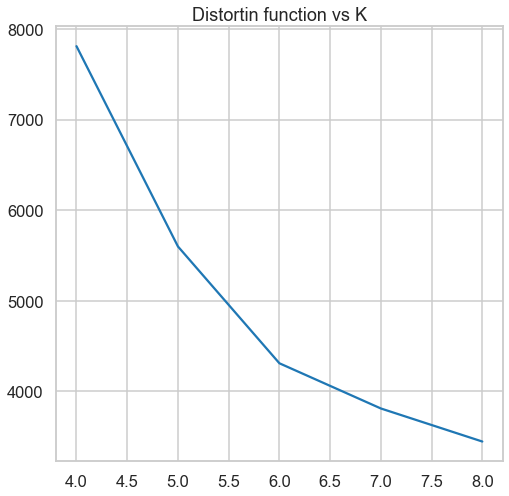

In [483]:
distortion_function(k,Multi_blob_Data_df1)
#best k is 6

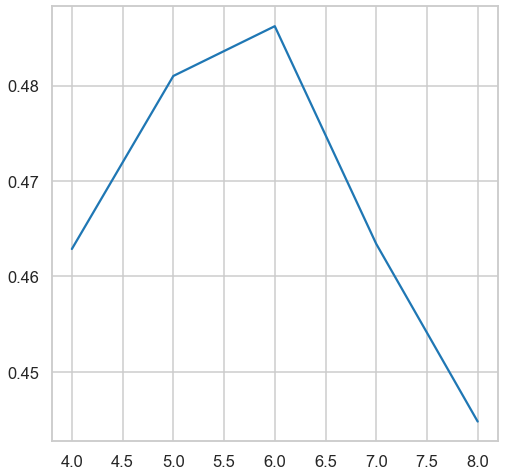

In [484]:
#silhouette_score
Multi_blob_silhouette_scores_kmeans=[]

for i in k :
    Multi_blob_silhouette_scores_kmeans.append(silhouette_score(Multi_blob_Data_df1, Multi_blob_Data_df['k'+str(i)]))

plt.plot(k,Multi_blob_silhouette_scores_kmeans)
#best k is 6

In [485]:
best_Multi_blob_silhouette_score_kmeans=max(Multi_blob_silhouette_scores_kmeans)
best_Multi_blob_silhouette_score_kmeans

0.4862244267408599

In [486]:
# when k = 6
k[Multi_blob_silhouette_scores_kmeans.index(best_Multi_blob_silhouette_score_kmeans)]

6

In [487]:
Multi_blob_best_silhouette_scores.append(best_Multi_blob_silhouette_score_kmeans)
Multi_blob_best_references.append(k[Multi_blob_silhouette_scores_kmeans.index(best_Multi_blob_silhouette_score_kmeans)])

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine) --> distance metric
    * Linkage( use average and single ) --> merging multi points clusters
    * Distance_threshold (try different) 
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

In [488]:
def hierarchal_clustering(df,meth,metr,threshold,aff):
    dendrogram = sch.dendrogram(sch.linkage(df,method=meth, metric=metr))
    plt.axhline(y=threshold, color='r', linestyle='--')
    cluster = AgglomerativeClustering(n_clusters=None , distance_threshold = threshold, affinity=aff , linkage=meth)
    clustering = cluster.fit_predict(df)
    silhouette=silhouette_score(df, clustering)
    plt.title(aff + "/" +  str(threshold))
    return dendrogram , cluster , clustering ,silhouette

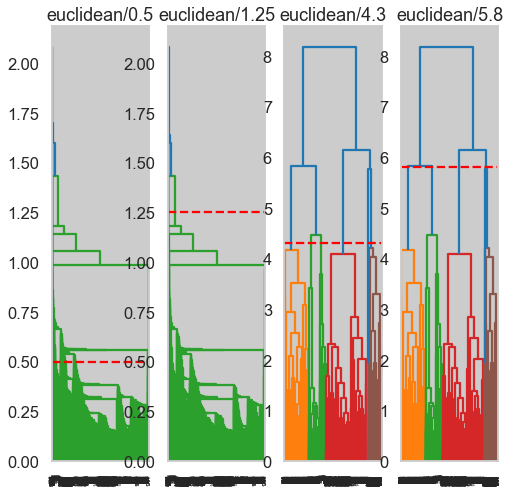

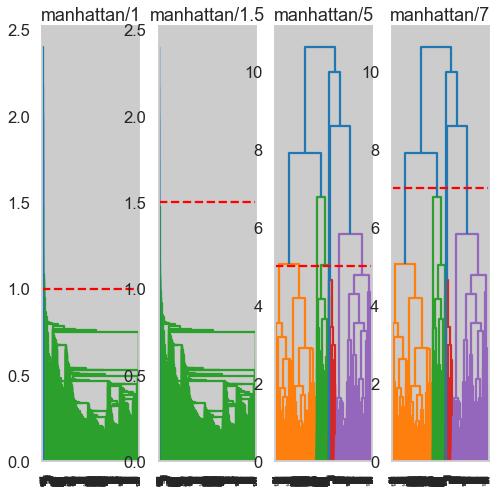

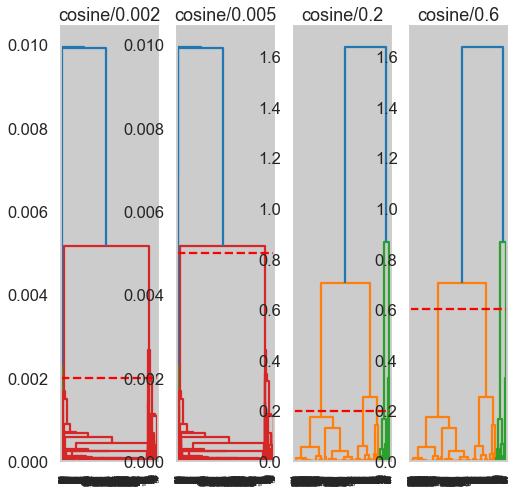

In [489]:
affinity = ['euclidean' , 'manhattan' ,'cosine']
linkage = ['single','average']
threshold =[]
Multi_blob_silhouette_scores_h = []
Multi_blob_silhouette_scores_reference = []
labels=[]
for aff in affinity :
    plt.figure()
    l=1
    for link in linkage :
        plt.subplot(140+l)
        if (aff=='manhattan'):
            if (link == 'single'):
                threshold=[1,1.5]
            else :
                threshold=[5,7]
            for thre in  threshold :
                plt.subplot(140+l)
                dendrogram , cluster , clustering , silhouette =hierarchal_clustering(Multi_blob_Data_df1,link,'cityblock',thre,aff)
                Multi_blob_silhouette_scores_h.append(silhouette)
                Multi_blob_silhouette_scores_reference.append(aff+'/'+link+'/'+str(thre) +'/'+ str(len(np.unique(clustering))))
                labels.append(clustering)
                l=l+1
        else :   
            if (aff=='euclidean'):
                if (link == 'single'):
                    threshold=[0.5,1.25]
                else :
                    threshold=[4.3,5.8]
            if (aff=='cosine'):
                if (link == 'single'):
                    threshold=[0.002,0.005]
                else :
                    threshold=[0.2,0.6]
            for thre in  threshold : 
                plt.subplot(140+l)
                dendrogram , cluster , clustering , silhouette =hierarchal_clustering(Multi_blob_Data_df1,link,aff,thre,aff)
                Multi_blob_silhouette_scores_h.append(silhouette)
                Multi_blob_silhouette_scores_reference.append(aff+'/'+link+'/'+str(thre)+'/'+str(len(np.unique(clustering))))
                labels.append(clustering)
                l=l+1

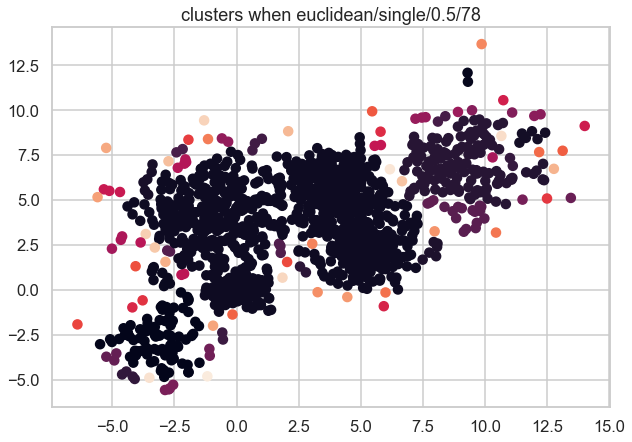

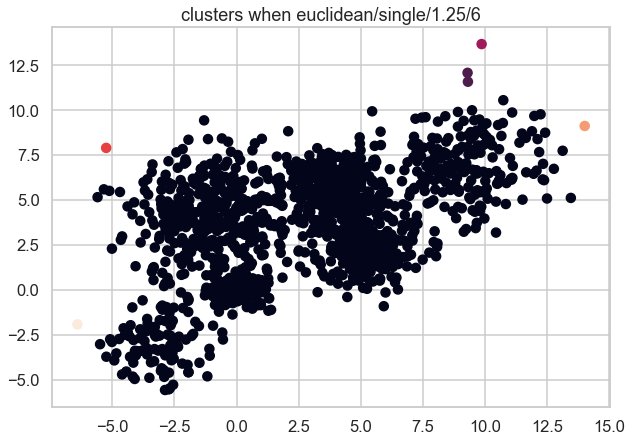

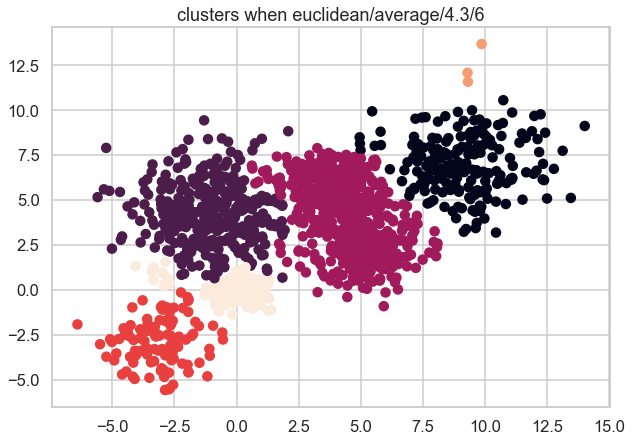

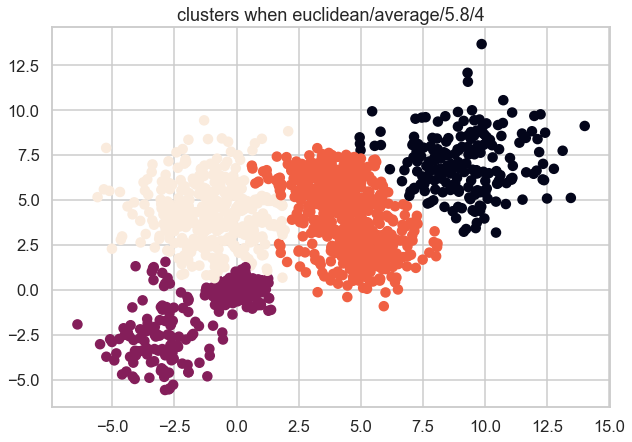

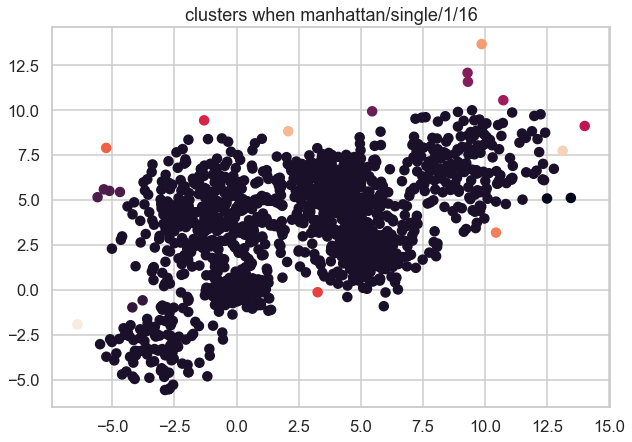

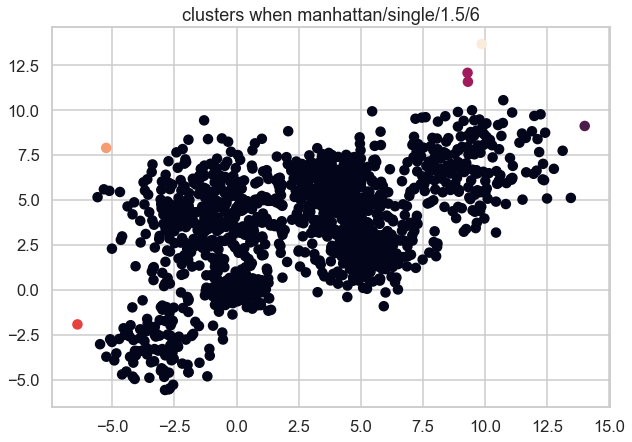

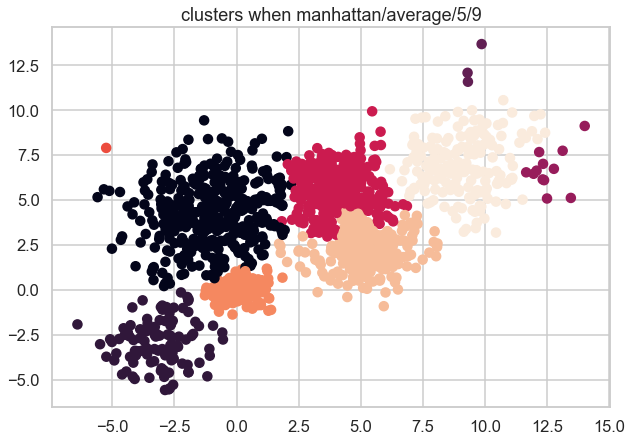

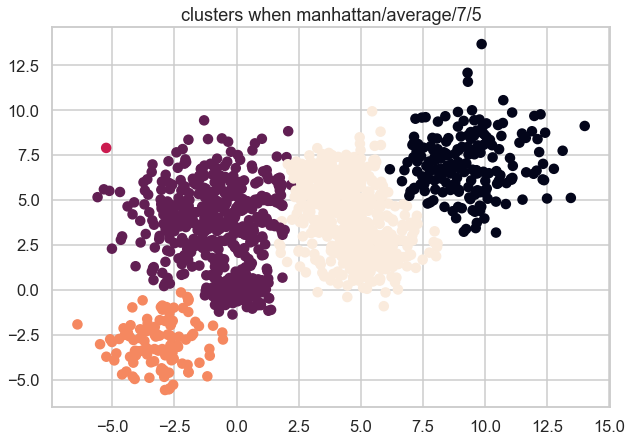

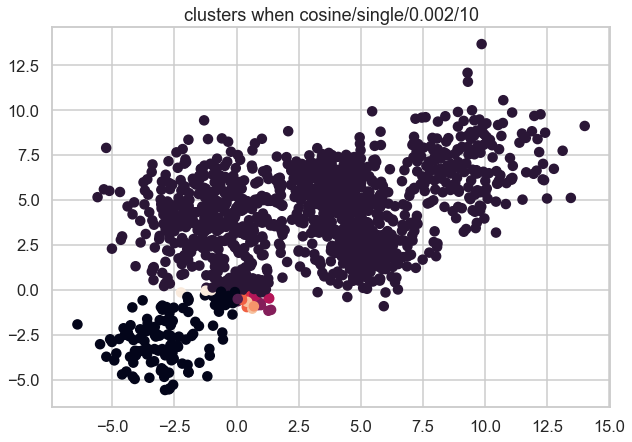

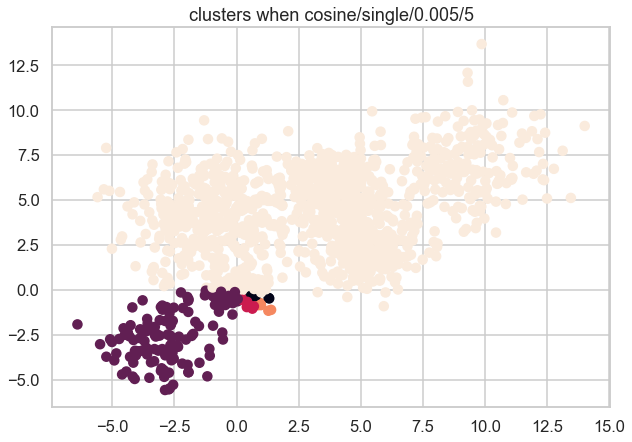

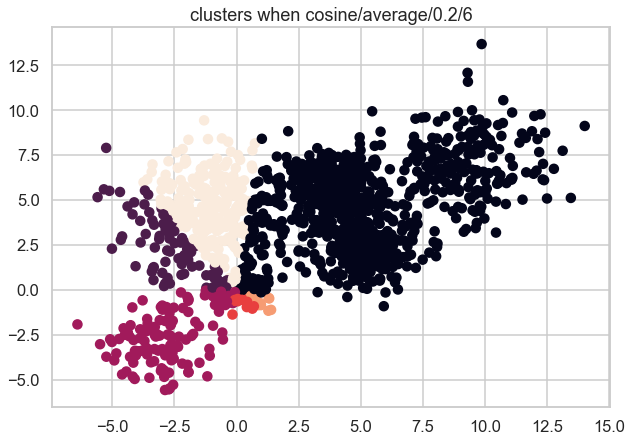

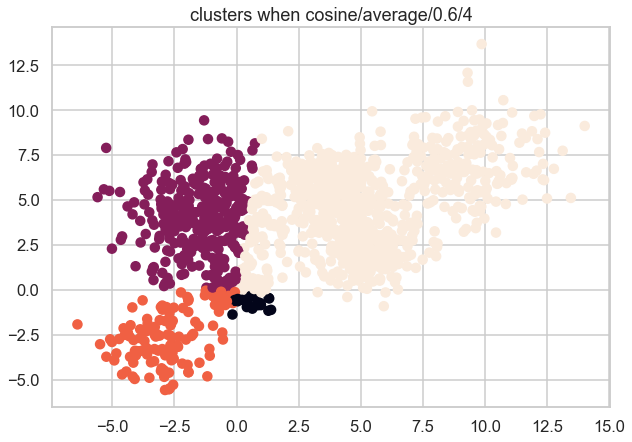

In [490]:
# plotting clusters for each case 
l=0
for i in labels :
    plt.figure(figsize=(10, 7))  
    plt.scatter(Multi_blob_Data_df1['x'], Multi_blob_Data_df1['y'], c=i)
    plt.title('clusters when '+ Multi_blob_silhouette_scores_reference[l])
    l= l+1

In [491]:
best_Multi_blob_silhouette_score_h = max(Multi_blob_silhouette_scores_h)
best_Multi_blob_silhouette_score_h

0.4490582469502603

In [492]:
# when average linkage with euclidean distance is used and 5.8 as threshold
Multi_blob_silhouette_scores_reference[Multi_blob_silhouette_scores_h.index(best_Multi_blob_silhouette_score_h)]

'euclidean/average/5.8/4'

In [493]:
len(np.unique(labels[Multi_blob_silhouette_scores_h.index(best_Multi_blob_silhouette_score_h)]))
# k = 4

4

In [494]:
Multi_blob_best_silhouette_scores.append(best_Multi_blob_silhouette_score_h)
Multi_blob_best_references.append(len(np.unique(labels[Multi_blob_silhouette_scores_h.index(best_Multi_blob_silhouette_score_h)])))

### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

In [495]:
# general function 
def db(df,epsilon, minpoints):
    dbscan = DBSCAN(eps=epsilon,min_samples=minpoints)
    clusters=dbscan.fit_predict(df)
    silhouette=silhouette_score(df, clusters)
    return  len(np.unique(clusters)) , clusters , silhouette 

In [496]:
def plotdbscatter(df,clusters,eps,minpoints,number):
    plt.subplot(number)
    plt.scatter(df['x'], df['y'], c=clusters , s=10) 
    plt.title("eps =" + str(eps) + ", minpoints = " + str(minpoints))

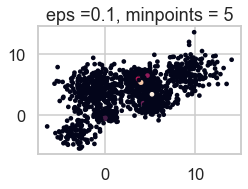

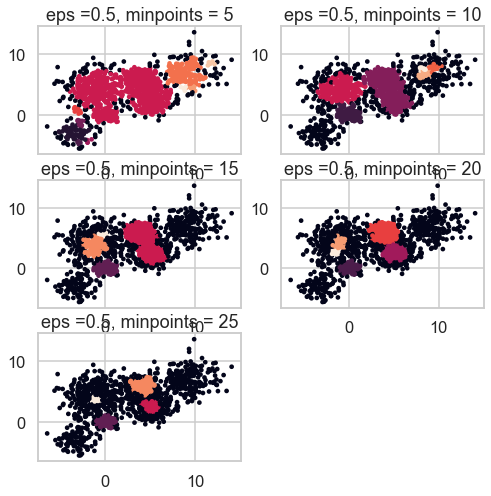

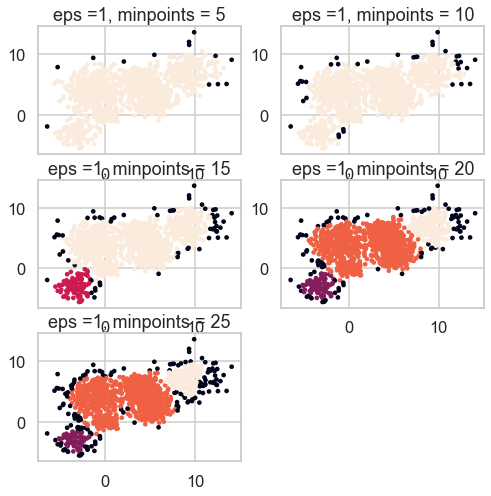

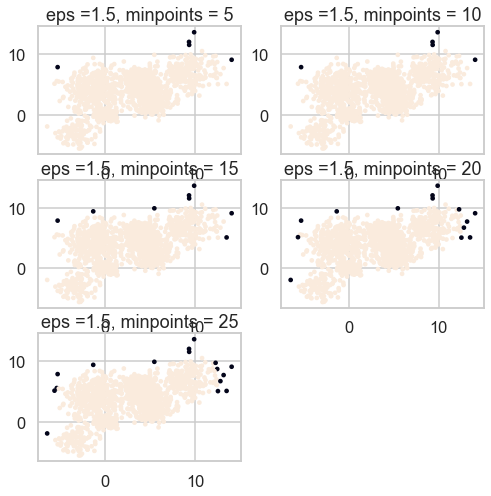

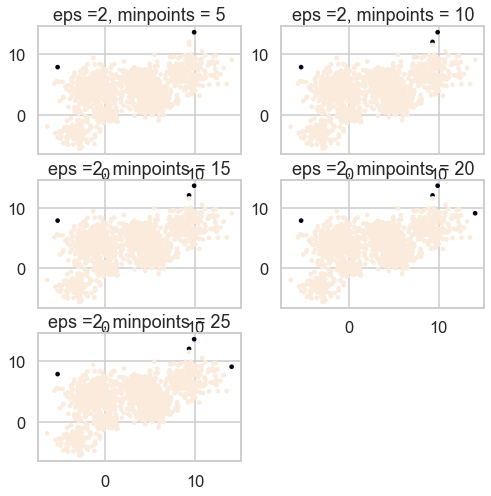

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

In [497]:
eps= [0.1,0.5,1,1.5,2,2.5,3]
minpoints = [5,10,15,20,25]
Multi_blob_silhouette_scores_db =[]
cases=[]
for i in eps :
    l=1
    plt.figure()
    for j in minpoints :
        try :
            num_of_clusters , clusters , silhouette  = db(Multi_blob_Data_df1,i, j)
            Multi_blob_silhouette_scores_db.append(silhouette)
            cases.append("eps =" + str(i) + ", minpoints = " + str(j))
            plotdbscatter(Multi_blob_Data_df1,clusters,i,j,320+l)
            l=l+1
        except : 
            break

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

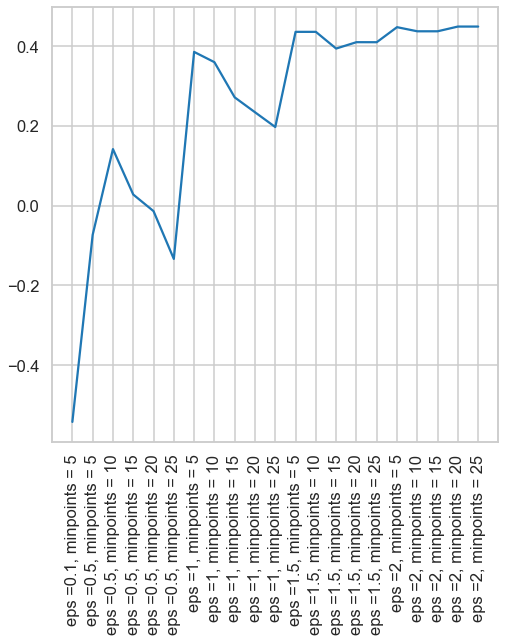

In [498]:
plt.plot(cases,Multi_blob_silhouette_scores_db)
plt.xticks(rotation=90)

Although Highest silhouette scores when eps = 1 / 1.5 / 2 , details are gone .
and there is alot of noise if eps less than 0.5 

0.08417908115519428

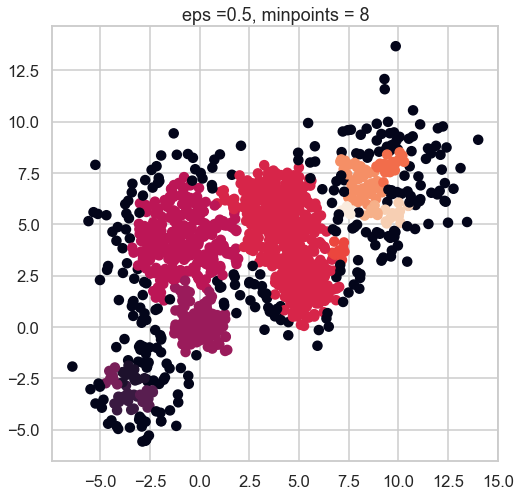

In [499]:
# eps = 0.5 is a good starting tuning for eps parameter  
# in this case for minpoints , it seems between 5 and 10 lets try 8 
num_of_clusters , db_clustering , silhouette  = db(Multi_blob_Data_df1,0.5, 8)
plt.scatter(Multi_blob_Data_df1['x'], Multi_blob_Data_df1['y'], c=db_clustering ) 
plt.title("eps =" + str(0.5) + ", minpoints = " + str(8))
silhouette
# too much clusters and very small silhouette

Text(0.5, 1.0, 'eps =0.8, minpoints = 23')

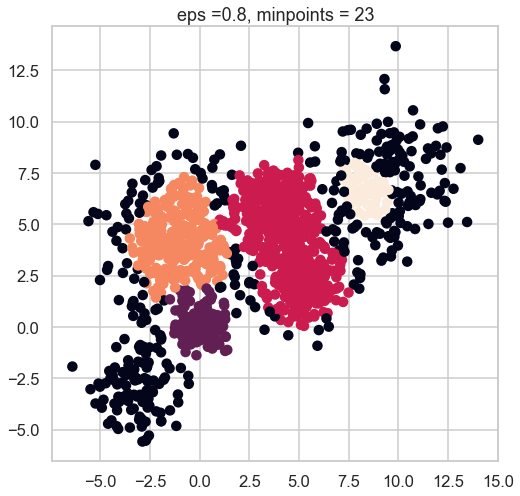

In [500]:
# let's make the eps = 0.8 
num_of_clusters , db_clustering , silhouette  = db(Multi_blob_Data_df1,0.8, 23)
plt.scatter(Multi_blob_Data_df1['x'], Multi_blob_Data_df1['y'], c=db_clustering) 
case = "eps =" + str(.8) + ", minpoints = " + str(23) + "," + str(num_of_clusters)
plt.title("eps =" + str(.8) + ", minpoints = " + str(23))

In [501]:
best_Multi_blob_silhouette_score_db = silhouette
best_Multi_blob_silhouette_score_db

0.19591110367773315

In [502]:
Multi_blob_best_silhouette_scores.append(silhouette)
Multi_blob_best_references.append(case)

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting probability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

In [503]:
def gmm(df):
    silhouette_scores=[]
    cases=[]
    n = [2,3,5,6]
    cov = ['full','spherical','diag']
    for i in n :
        for j in cov :
            GMM = GaussianMixture(n_components= i , covariance_type=j )
            GMM.fit(df)
            hard_clusters=GMM.predict(df)
            soft_clusters=GMM.predict_proba(df)
            silhouette=silhouette_score(df, hard_clusters)
            silhouette_scores.append(silhouette)
            cases.append(str(j)+'/'+str(i))
    
    plt.plot(cases,silhouette_scores)
    plt.xticks(rotation=90)
    return hard_clusters , silhouette_scores , cases

In [504]:
def draw_ellipse(mean, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position (mean) and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for circle in range(1, 4):
        ax.add_patch(Ellipse(mean, circle * width, circle * height, 
                             angle, **kwargs))
        
        
def plot_gmm(gmm, X , ax=None):
    labels = gmm.fit(X).predict(X)
    #plot data points due to different clusters
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=20, cmap='viridis', zorder=2)
    for mean, covariance, weight in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        print(mean)
        draw_ellipse(mean, covariance, alpha=weight)       


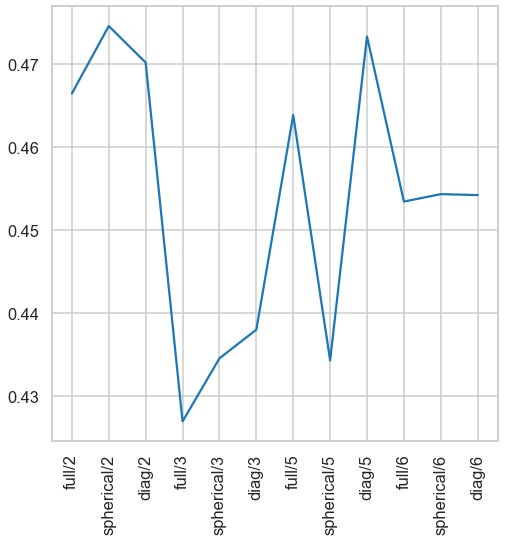

In [505]:
hard_clusters , silhouette_scores , cases =  gmm(Multi_blob_Data_df1)

In [506]:
best_Multi_blob_silhouette_score_gmm = max(silhouette_scores)
# when average linkage with euclidean distance is used and 5.8 as threshold
cases[silhouette_scores.index(best_Multi_blob_silhouette_score_gmm)]

'spherical/2'

In [507]:
GMM = GaussianMixture(n_components= 2 ) # default='full'
GMM.fit(Multi_blob_Data_df1)
hard_clusters=GMM.predict(Multi_blob_Data_df1)
soft_clusters=GMM.predict_proba(Multi_blob_Data_df1)
silhouette=silhouette_score(Multi_blob_Data_df1, hard_clusters)

[5.10178879 4.73995367]
[-1.2910014   1.96003375]


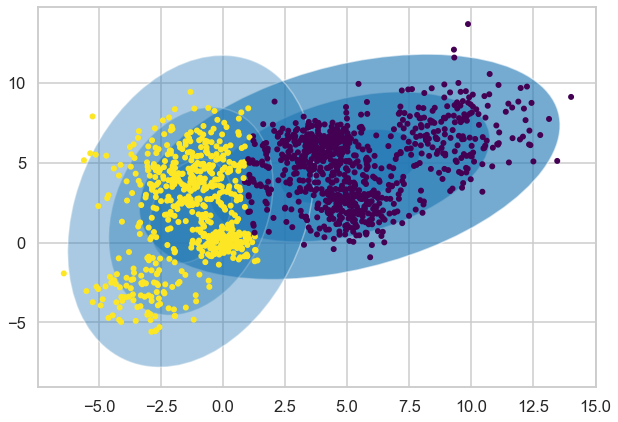

In [508]:
plt.figure(figsize=(10, 7))
plot_gmm(GMM, Multi_blob_Data)

In [509]:
# 2 clusters is not significant 
#as it's some how like kmeans clustering so we can assume n_componants is 6 (best for kmeans)
# as our data is on the same scale no need for z transformation 

In [510]:
GMM = GaussianMixture(n_components= 6 ) # default='full'
GMM.fit(Multi_blob_Data_df1)
hard_clusters1=GMM.predict(Multi_blob_Data_df1)
soft_clusters1=GMM.predict_proba(Multi_blob_Data_df1)
silhouette1=silhouette_score(Multi_blob_Data_df1, hard_clusters)

In [511]:
hard_clusters1

array([3, 3, 3, ..., 0, 0, 0], dtype=int64)

In [512]:
soft_clusters1

array([[8.85525002e-17, 3.50025734e-04, 2.04983272e-25, 9.99649974e-01,
        2.00056952e-33, 1.21024977e-24],
       [2.71646190e-14, 1.77686866e-02, 1.52326149e-19, 9.82231313e-01,
        4.23096562e-23, 1.21773874e-18],
       [1.32090628e-18, 1.78574735e-04, 1.12854437e-30, 9.99821425e-01,
        3.30782166e-37, 1.18773652e-28],
       ...,
       [9.99999941e-01, 9.55041185e-13, 1.85671721e-36, 5.91051444e-08,
        1.87385692e-22, 1.64482050e-24],
       [9.95530199e-01, 4.66474797e-04, 8.04611524e-11, 9.33352375e-05,
        3.90941012e-03, 5.80389737e-07],
       [9.99963226e-01, 6.92469163e-09, 1.00732364e-11, 2.76111373e-05,
        7.31359021e-06, 1.84194706e-06]])

In [513]:
silhouette1

0.46648996330278436

In [514]:
GMM = GaussianMixture(n_components= 6 , covariance_type='spherical' )
GMM.fit(Multi_blob_Data_df1)
hard_clusters2=GMM.predict(Multi_blob_Data_df1)
soft_clusters2=GMM.predict_proba(Multi_blob_Data_df1)
silhouette2=silhouette_score(Multi_blob_Data_df1, hard_clusters)
silhouette2

0.46648996330278436

In [515]:
hard_clusters2

array([3, 3, 3, ..., 2, 2, 2], dtype=int64)

In [516]:
soft_clusters2

array([[2.10127183e-015, 2.34357423e-004, 1.28915575e-017,
        9.99765640e-001, 9.78810259e-034, 2.39211448e-009],
       [6.31364364e-011, 8.12450798e-002, 6.70125697e-014,
        9.10698467e-001, 6.00532983e-023, 8.05645328e-003],
       [2.28064010e-018, 7.86279984e-005, 1.59354857e-019,
        9.99921372e-001, 5.43348028e-038, 3.75916656e-013],
       ...,
       [8.08561844e-023, 6.73385129e-012, 1.00000000e+000,
        1.64368717e-064, 1.25513016e-022, 9.89779927e-165],
       [2.02596054e-008, 4.36982818e-004, 9.96982202e-001,
        3.18837543e-035, 2.58079489e-003, 3.84165461e-074],
       [1.32695386e-006, 1.62831400e-007, 9.99995507e-001,
        1.56399270e-037, 3.00358984e-006, 1.16841442e-075]])

In [517]:
GMM = GaussianMixture(n_components= 6 , covariance_type='diag' )
GMM.fit(Multi_blob_Data)
hard_clusters3=GMM.predict(Multi_blob_Data)
soft_clusters3=GMM.predict_proba(Multi_blob_Data)
silhouette3=silhouette_score(Multi_blob_Data, hard_clusters)
silhouette3
weights = GMM.weights_
means = GMM.means_
covariances = GMM.covariances_
silhouette3

0.46648996330278436

In [518]:
soft_clusters3

array([[5.85966604e-004, 4.51960215e-018, 1.52735502e-015,
        8.05920758e-034, 9.99414033e-001, 5.66693841e-010],
       [1.05482594e-001, 1.32999040e-014, 2.11428295e-011,
        7.72786830e-023, 8.86374817e-001, 8.14258823e-003],
       [1.81335628e-004, 3.84821106e-020, 1.16156778e-018,
        6.93281529e-038, 9.99818664e-001, 1.11744984e-013],
       ...,
       [9.39165846e-013, 1.00000000e+000, 2.52211067e-021,
        8.34572794e-023, 2.17055400e-062, 2.57810572e-178],
       [2.95726523e-004, 9.97327938e-001, 1.86335922e-007,
        2.37614879e-003, 4.81784368e-033, 6.16398467e-082],
       [2.22064864e-008, 9.99991449e-001, 2.56292701e-006,
        5.96598781e-006, 2.37371440e-038, 3.42696446e-078]])

In [519]:
# as higher silhouettte score is when covariance type is diag so we will use it to plot

[-0.91519262  4.11213079]
[5.12782996 2.45547667]
[9.15619512 6.9267593 ]
[ 0.05201378 -0.00126371]
[-3.13551222 -2.92627587]
[3.94641203 5.95416058]


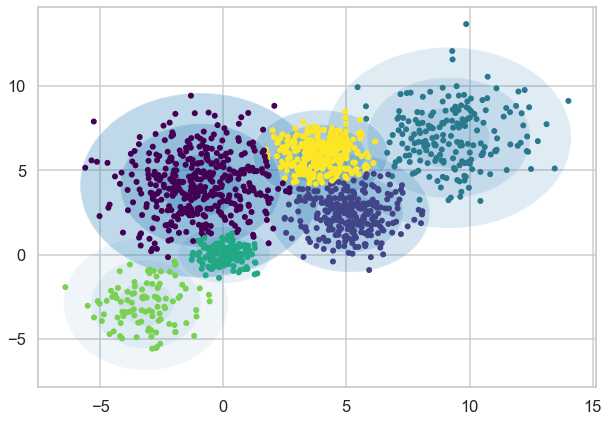

In [520]:
plt.figure(figsize=(10, 7))
plot_gmm(GMM, Multi_blob_Data)

In [522]:
Multi_blob_best_silhouette_scores.append(silhouette3)
Multi_blob_best_references.append('Diag/6')

In [526]:
Multi_blob_best_silhouette_scores

[0.4862244267408599,
 0.4490582469502603,
 0.19591110367773315,
 0.46648996330278436,
 0.46648996330278436]

In [523]:
Multi_blob_best_references[Multi_blob_best_silhouette_scores.index(max(Multi_blob_best_silhouette_scores))]

6

### From above we can see that the max best silhouette for each technique is  k means with value of 0.4862244267408599
### so we can choosek means for clustering  Multi_blob_Data

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

In [536]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
# 3 clusters 
list(iris_data.target_names)

['setosa', 'versicolor', 'virginica']

In [537]:
iris_data['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [538]:
iris_data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [602]:
iris_data_dfo = pd.DataFrame(data= np.c_[iris_data['data'] , iris_data['target']],
                     columns= iris_data['feature_names']+['target'])
iris_data_npo = pd.DataFrame.to_numpy(iris_data_dfo)

In [604]:
iris_data_df = pd.DataFrame(data= np.c_[iris_data['data']],
                     columns= iris_data['feature_names'])
iris_data_np = pd.DataFrame.to_numpy(iris_data_df)

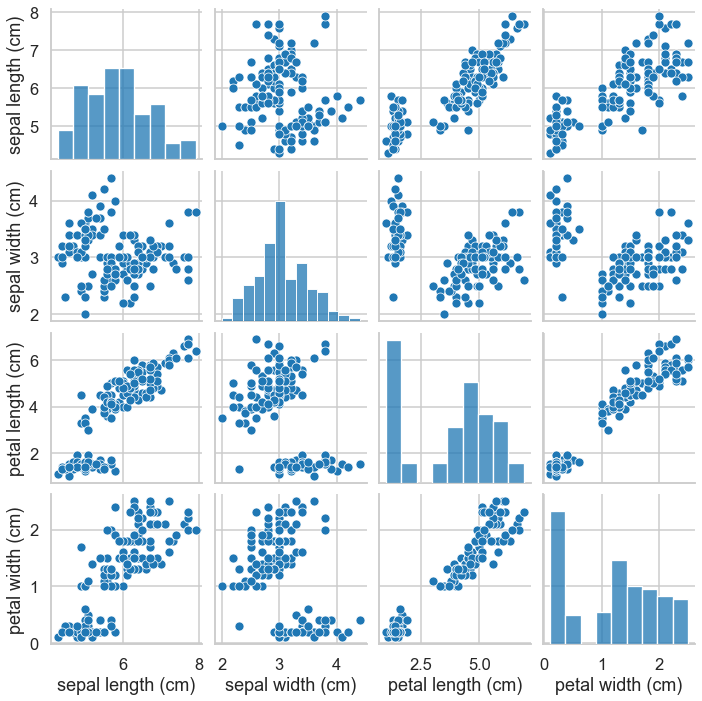

In [606]:
sns.pairplot(iris_data_df,  vars = iris_data_df.columns[0:4], height=2.5)
# not all features are guassian distributed

In [607]:
iris_best_silhouette_scores=[]
iris_best_references=[]

### Kmeans

In [608]:
def kmeans_multi(k,df):
    m = ["8","s","D","p", "v" , "H", "v", "^" ]
    Kmeans_model = KMeans(n_clusters=k, random_state=10)
    Kmeans_model_labels=Kmeans_model.fit_predict(df)
    Kmeans_model_df = df.copy()
    Kmeans_model_df['clusters']=Kmeans_model_labels
    sns.pairplot(Kmeans_model_df, hue='clusters',  vars=Kmeans_model_df.columns[0:4] , height=2.5, markers = m[0:k] )
    plt.title('when / ' + str(k) )
    return silhouette_score(df,Kmeans_model_labels)

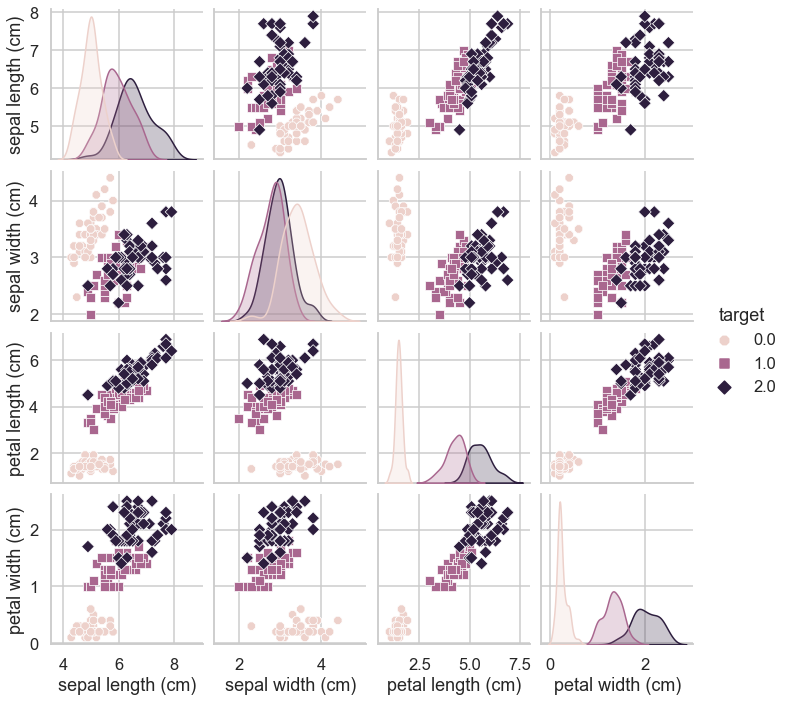

In [610]:
# original targets
m = ["8","s","D","p", "v" , "H", "v", "^" ]
sns.pairplot(iris_data_dfo, hue='target',  vars = iris_data_dfo.columns[0:4], height=2.5, markers = m[0:3])

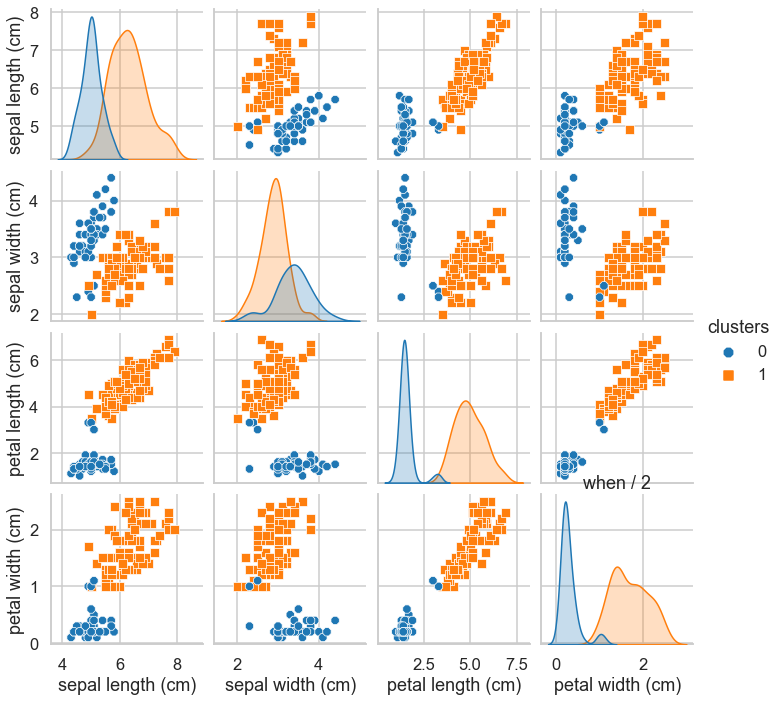

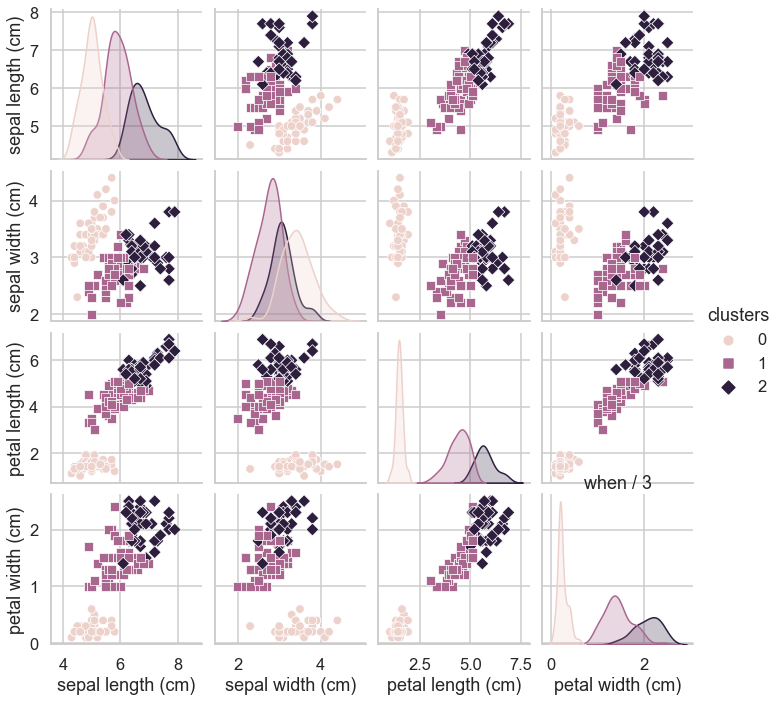

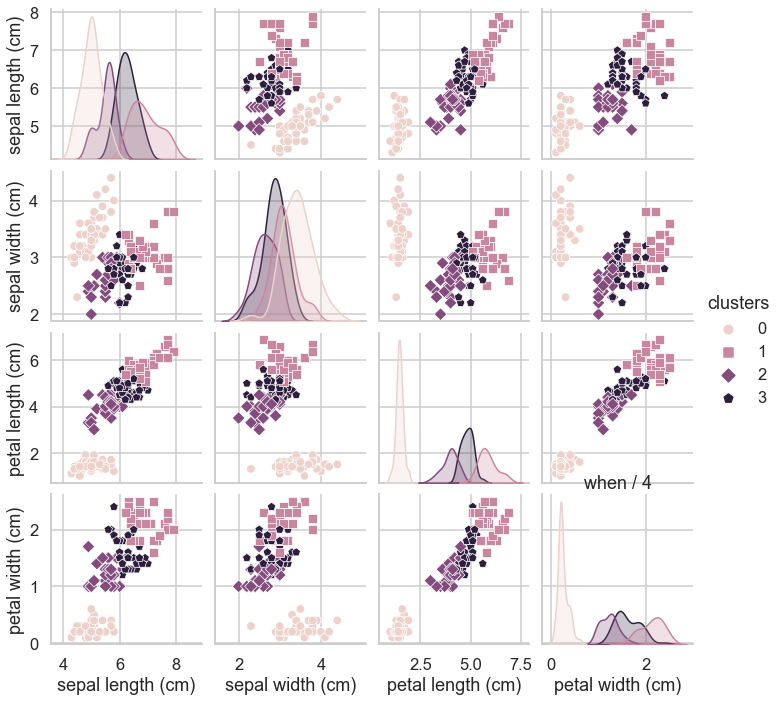

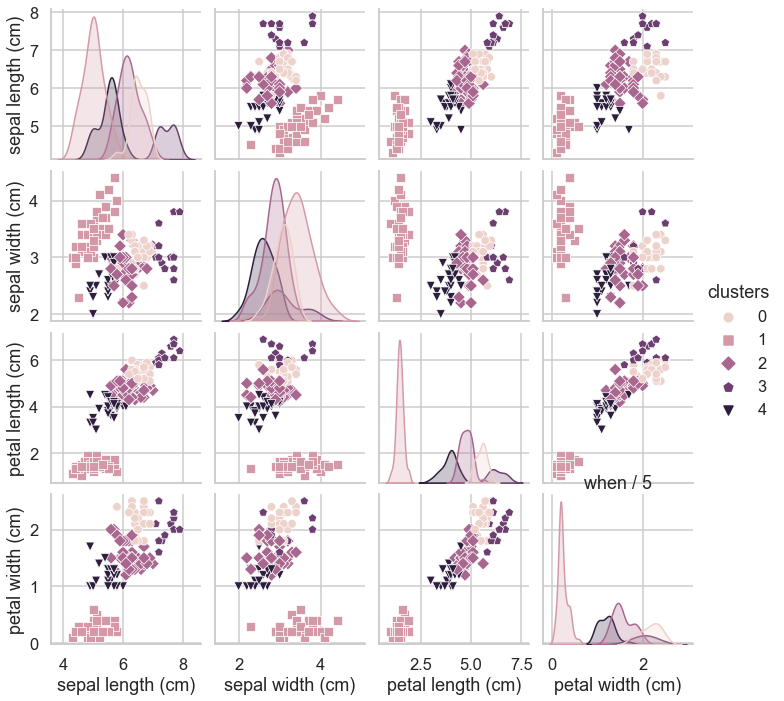

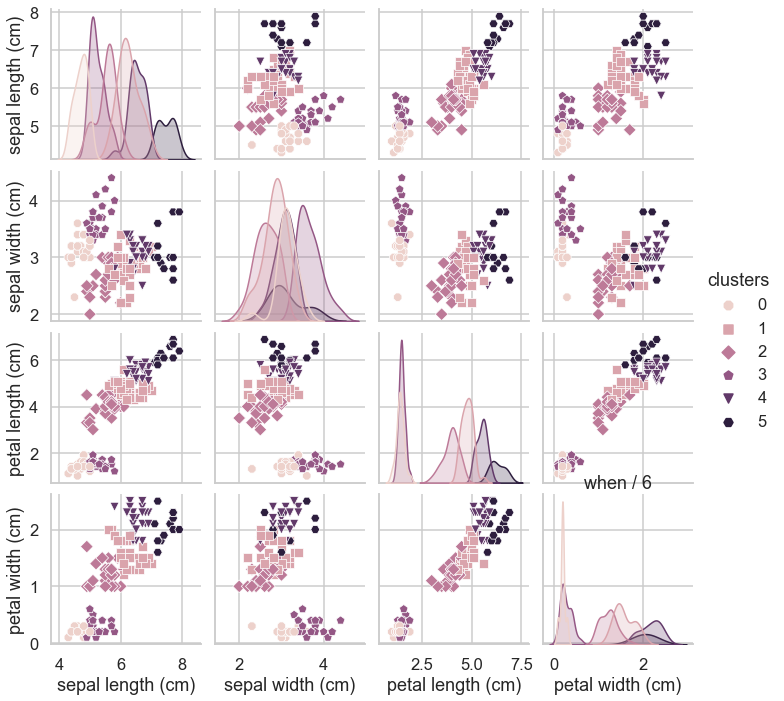

In [611]:
iris_silhouette_scores_kmeans = []
k=[2,3,4,5,6]
for item in k :
    iris_silhouette_scores_kmeans.append(kmeans_multi(item,iris_data_df))

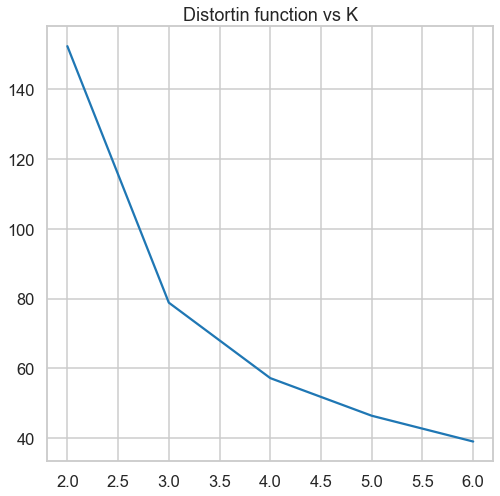

In [612]:
distortion_function(k,iris_data_df)
#elbow method goes for k =3

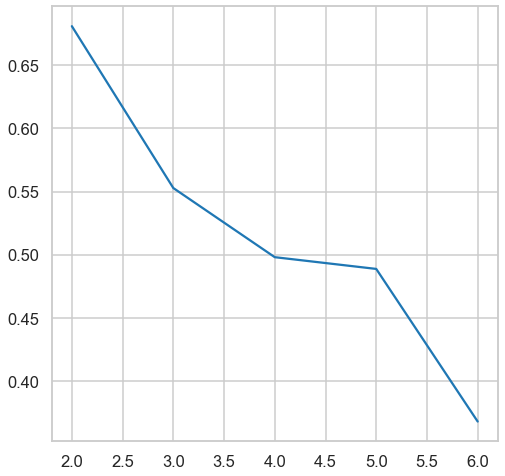

In [613]:
plt.plot(k,iris_silhouette_scores_kmeans)

In [614]:
# for our pirior knowledge they are 3 cluster, although silhouette_score of k = 3 is not the highest value for silhouette score of different k 
# but it is a good indicating number for a good choice of clustering
iris_best_silhouette_scores.append(iris_silhouette_scores_kmeans[k.index(3)])
iris_best_references.append('k-means')

### Hierarchal

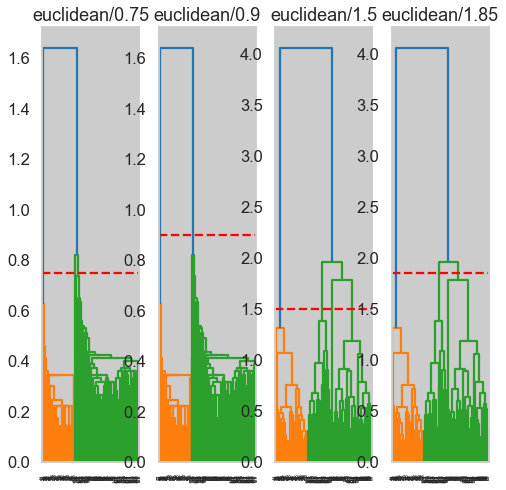

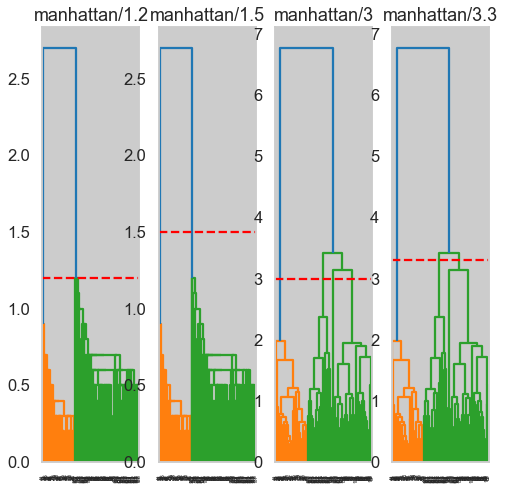

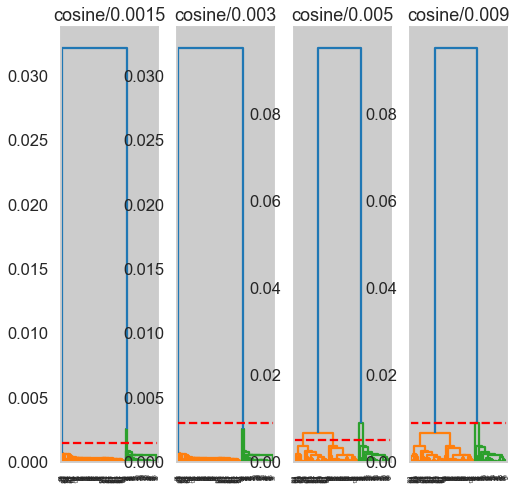

In [617]:
affinity = ['euclidean' , 'manhattan' ,'cosine']
linkage = ['single','average']
threshold =[]
h_silhouette_scores = []
h_silhouette_scores_reference = []
labels=[]
for aff in affinity :
    plt.figure()
    l=1
    for link in linkage :
        plt.subplot(140+l)
        if (aff=='manhattan'):
            if (link == 'single'):
                threshold=[1.2,1.5]
            else :
                threshold=[3,3.3]
            for thre in  threshold :
                plt.subplot(140+l)
                dendrogram , cluster , clustering , silhouette =hierarchal_clustering(iris_data_df,link,'cityblock',thre,aff)
                h_silhouette_scores.append(silhouette)
                h_silhouette_scores_reference.append(aff+'/'+link+'/'+str(thre) +'/'+ str(len(np.unique(clustering))))
                labels.append(clustering)
                l=l+1
        else :   
            if (aff=='euclidean'):
                if (link == 'single'):
                    threshold=[0.75,0.9]
                else :
                    threshold=[1.5,1.85]
            if (aff=='cosine'):
                if (link == 'single'):
                    threshold=[0.0015,0.003]
                else :
                    threshold=[0.005,0.009]
            for thre in  threshold : 
                plt.subplot(140+l)
                dendrogram , cluster , clustering , silhouette =hierarchal_clustering(iris_data_df,link,aff,thre,aff)
                h_silhouette_scores.append(silhouette)
                h_silhouette_scores_reference.append(aff+'/'+link+'/'+str(thre)+'/'+str(len(np.unique(clustering))))
                labels.append(clustering)
                l=l+1

In [618]:
h_silhouette_scores 

[0.5121107753649307,
 0.6867350732769777,
 0.47199360849942534,
 0.5541608580282851,
 0.34029603418948823,
 0.6867350732769777,
 0.47195185980984994,
 0.5535372928319979,
 0.5538078922044992,
 0.6867350732769777,
 0.3594039453869132,
 0.5538078922044992]

In [620]:
h_silhouette_scores_reference

['euclidean/single/0.75/3',
 'euclidean/single/0.9/2',
 'euclidean/average/1.5/4',
 'euclidean/average/1.85/3',
 'manhattan/single/1.2/3',
 'manhattan/single/1.5/2',
 'manhattan/average/3/4',
 'manhattan/average/3.3/3',
 'cosine/single/0.0015/3',
 'cosine/single/0.003/2',
 'cosine/average/0.005/4',
 'cosine/average/0.009/3']

Text(0.5, 1.0, 'euclidean/average/1.85/3')

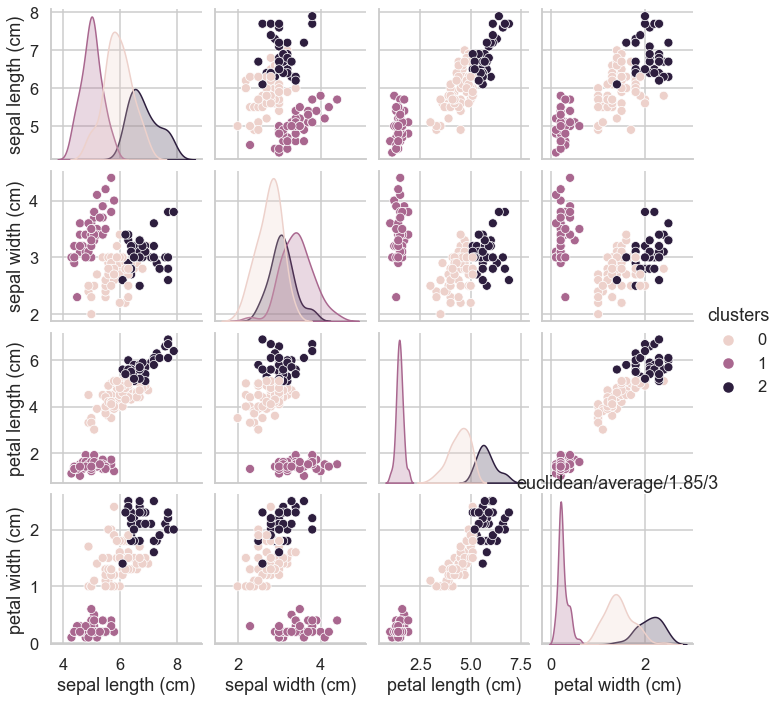

In [622]:
#  for our pirior knowledge of 3 classes of this data and for the proper defined clusters best k is 3 for :
                                        #'euclidean/average/1.85/3 
                                        
h_df =  iris_data_df.copy()
h_df['clusters']=labels[3]
sns.pairplot(h_df, hue='clusters',  vars=h_df.columns[0:4] , height=2.5)
plt.title(h_silhouette_scores_reference[3])


In [623]:
iris_best_silhouette_scores.append(h_silhouette_scores[3])
iris_best_references.append(h_silhouette_scores_reference[3])

In [624]:
iris_best_silhouette_scores

[0.5528190123564095, 0.5541608580282851]

### DBscan

In [625]:
def db_m(df):
    eps= [0.1,0.5,1,1.5,2,2.5,3]
    minpoints = [5,10,15,20,25]
    silhouette_scores =[]
    cases=[]
    for i in eps :
        l=1
        for j in minpoints :
            try :
                num_of_clusters , clusters , silhouette  = db(df,i, j)
                silhouette_scores.append(silhouette)
                cases.append("eps =" + str(i) + ", minpoints = " + str(j))
                l=l+1
            except : 
                print('one cluster')
                break
    return cases , silhouette_scores

one cluster
one cluster
one cluster
one cluster


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

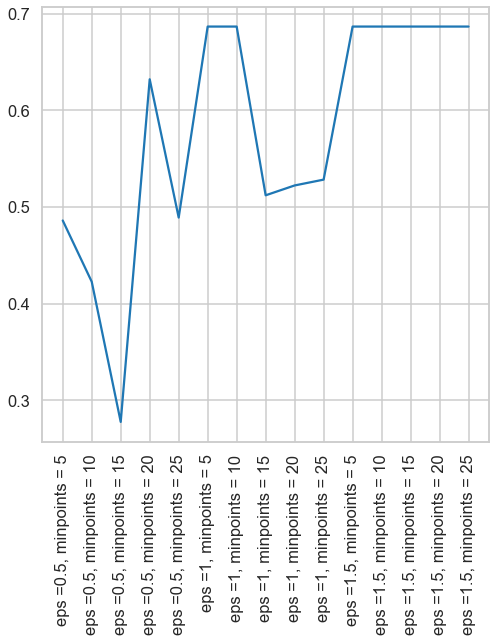

In [626]:
db_cases , db_silhouette_scores = db_m(iris_data_df)
plt.plot(db_cases,db_silhouette_scores)
plt.xticks(rotation=90)

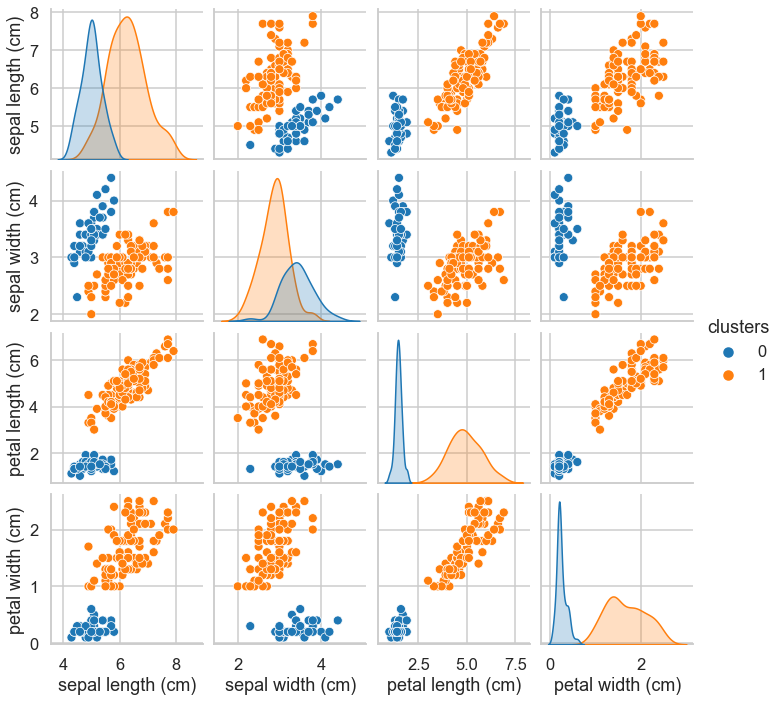

In [629]:
#high silhouette_score is where eps = 1.5 and minpoints are 5 then the pairplot is but and it's 2 clusters
num_of_clusters , clusters , silhouette1  = db(iris_data_df,1.5, 5)
db_df =  iris_data_df.copy()
db_df['clusters']=clusters
sns.pairplot(db_df, hue='clusters',  vars=db_df.columns[0:4] , height=2.5)

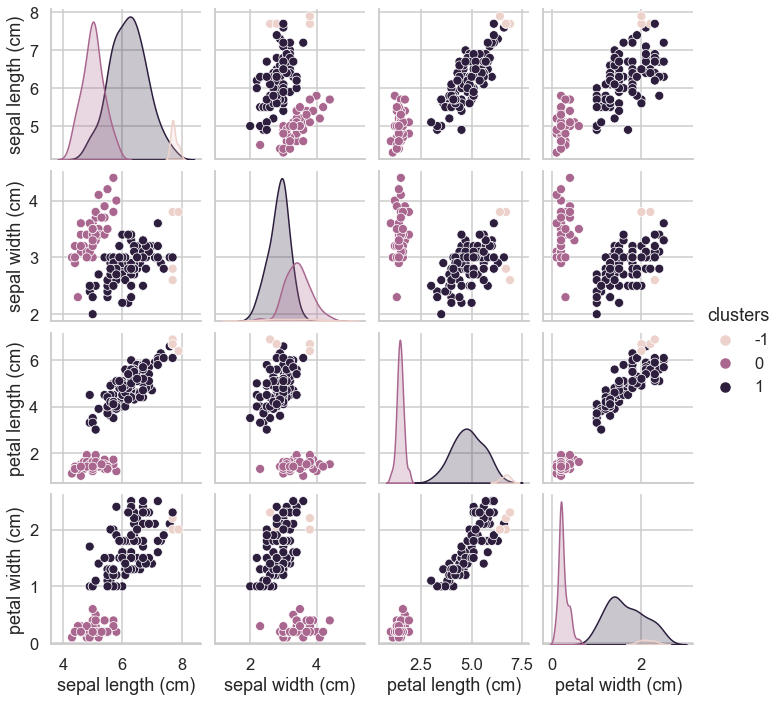

In [631]:
#third high silhouette_score is where eps = 1 and minpoints are 25 and it's 3 clusters  so we will select it
num_of_clusters , clusters , silhouette3  = db(iris_data_df,1, 25)
db_df =  iris_data_df.copy()
db_df['clusters']=clusters
sns.pairplot(db_df, hue='clusters',  vars=db_df.columns[0:4] , height=2.5)

In [632]:
iris_best_silhouette_scores.append(silhouette3)
iris_best_references.append("eps =1 , minpoints= 25 ")

### GMM

In [635]:
def gmm_m(df):
    silhouette_scores=[]
    cases=[]
    n = [2,3,5,6]
    cov = ['full','spherical','diag']
    for i in n :
        for j in cov :
            GMM = GaussianMixture(n_components= i , covariance_type=j )
            GMM.fit(df)
            hard_clusters=GMM.predict(df)
            soft_clusters=GMM.predict_proba(df)
            silhouette=silhouette_score(df, hard_clusters)
            silhouette_scores.append(silhouette)
            cases.append(str(j)+'/'+str(i))
    plt.plot(cases,silhouette_scores)
    plt.xticks(rotation=90)

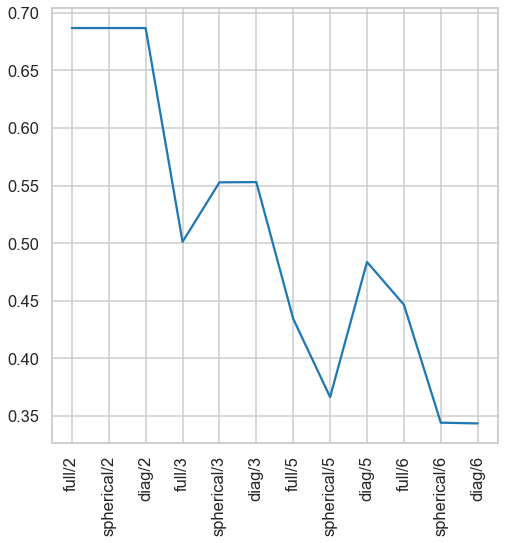

In [637]:
gmm_m(iris_data_df)    

In [638]:
# 2 clusters has the highest silhouette score
# and then the 3 spherical clusters and this closer to be true.  
def gmm(df,n,cov):
    GMM = GaussianMixture(n_components= n , covariance_type=cov )
    hard_clusters=GMM.fit(df).predict(df)
    return hard_clusters
hard_clusters = gmm(iris_data_np,3,'spherical')

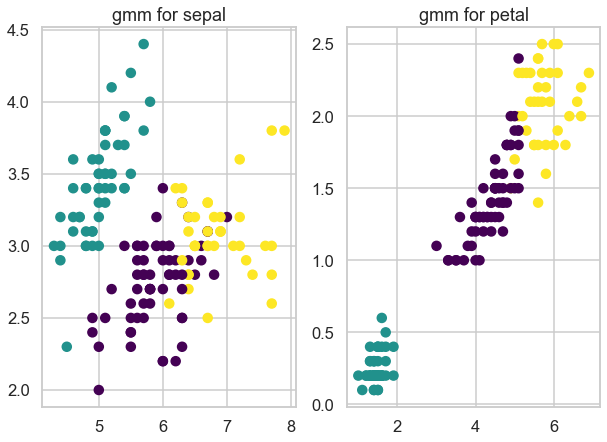

In [639]:
plt.figure(figsize=(10, 7))
plt.subplot(1,2,1)
plt.title('gmm for sepal')
plt.scatter(iris_data_df['sepal length (cm)'],iris_data_df['sepal width (cm)'],c=hard_clusters , cmap='viridis' , zorder=2)
plt.subplot(1,2,2)
plt.title('gmm for petal')
plt.scatter(iris_data_df['petal length (cm)'],iris_data_df['petal width (cm)'],c=hard_clusters , cmap='viridis' , zorder=2)

In [641]:
iris_best_silhouette_scores.append(silhouette_score(iris_data_df, hard_clusters))
iris_best_references.append("Spherical/3")

In [642]:
iris_best_references[iris_best_silhouette_scores.index(max(iris_best_silhouette_scores))]

'euclidean/average/1.85/3'

In [643]:
max(iris_best_silhouette_scores)

0.5541608580282851

### From above we can see that the max best silhouette for each technique is heirarical with value of 0.5541608580282851
### so we can choose heirarical for clustering  iris_Data

### Normalizing 

In [644]:
iris_data_df.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000

In [685]:
iris_data_norm = prep.MinMaxScaler().fit_transform(iris_data['data'])
iris_data_norm

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [686]:
iris_data_df_normo = pd.DataFrame(data= np.c_[iris_data_norm , iris_data['target']],
                     columns= iris_data['feature_names']+['target'])
iris_data_np_normo = pd.DataFrame.to_numpy(iris_data_df_normo)

In [687]:
iris_data_df_norm = pd.DataFrame(data= np.c_[iris_data_norm ],
                     columns= iris_data['feature_names'])
iris_data_np_norm = pd.DataFrame.to_numpy(iris_data_df_norm)

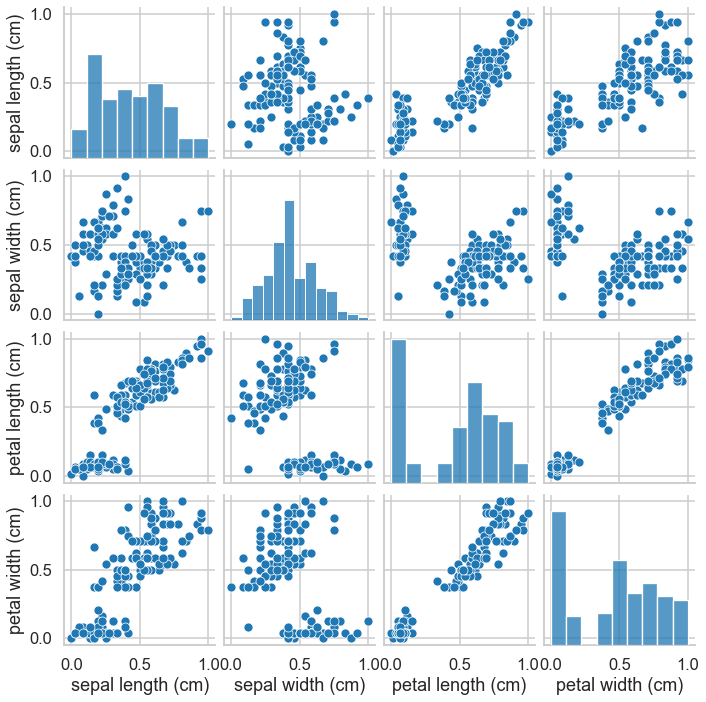

In [649]:
sns.pairplot(iris_data_df_norm,  vars = iris_data_df_norm.columns[0:4], height=2.5)

In [654]:
iris_norm_best_silhouette_scores=[]
iris_norm_best_references=[]

### Kmeans

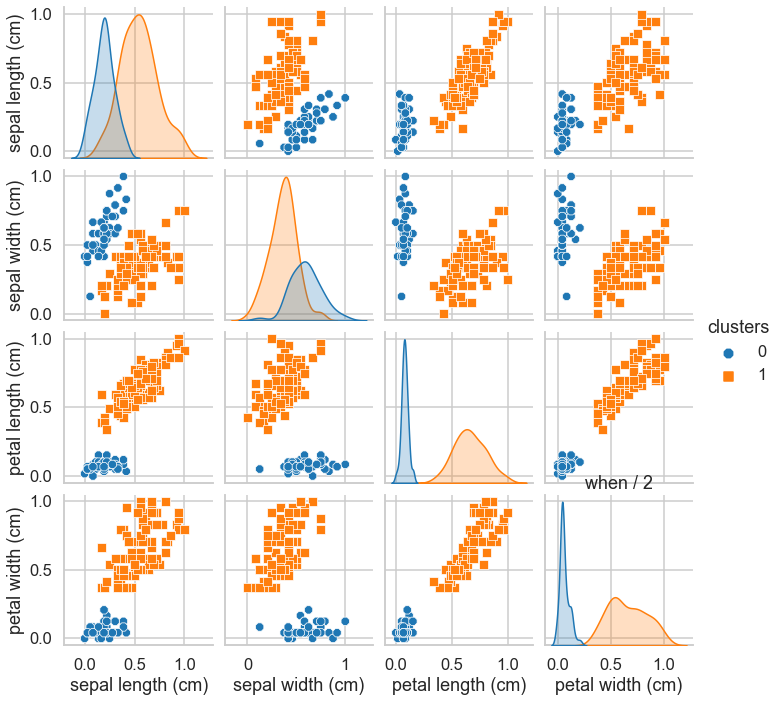

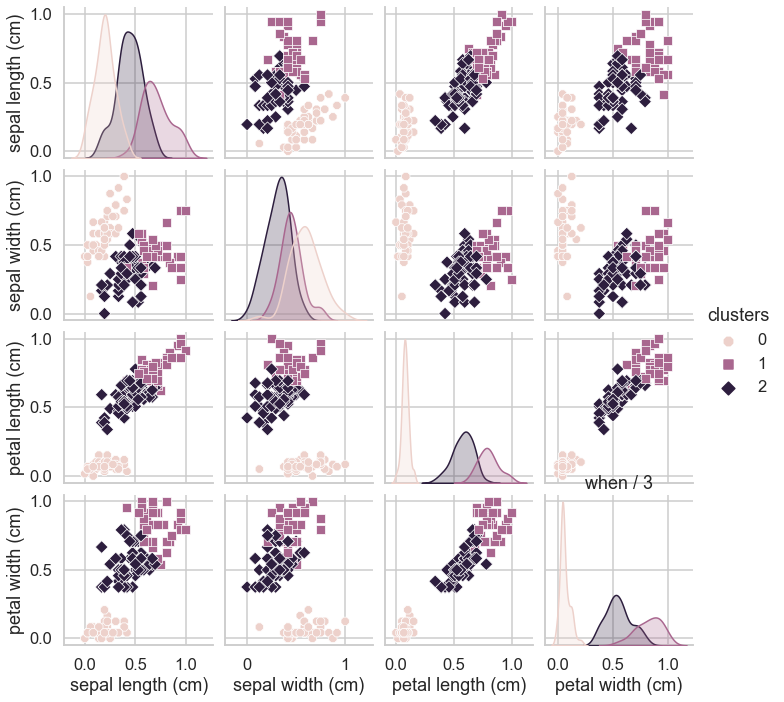

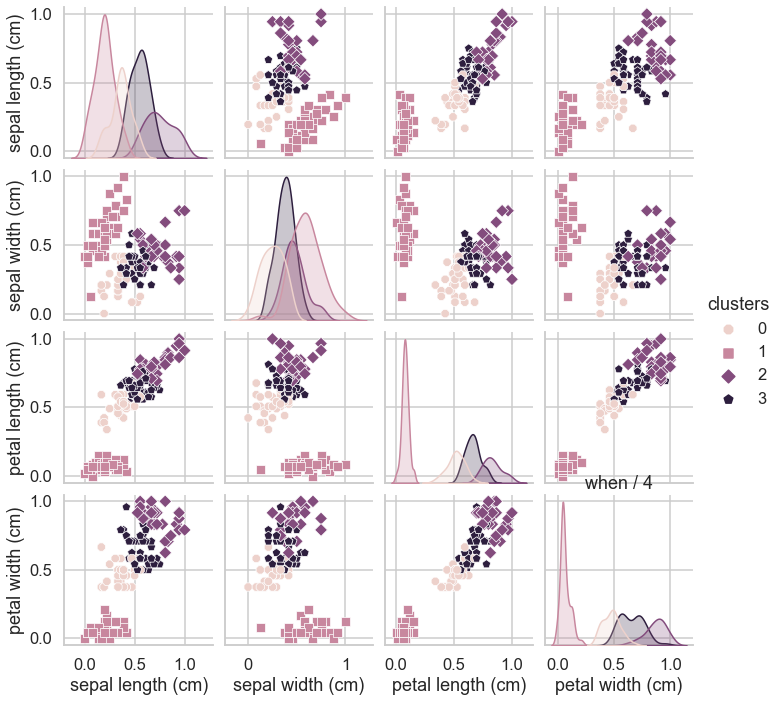

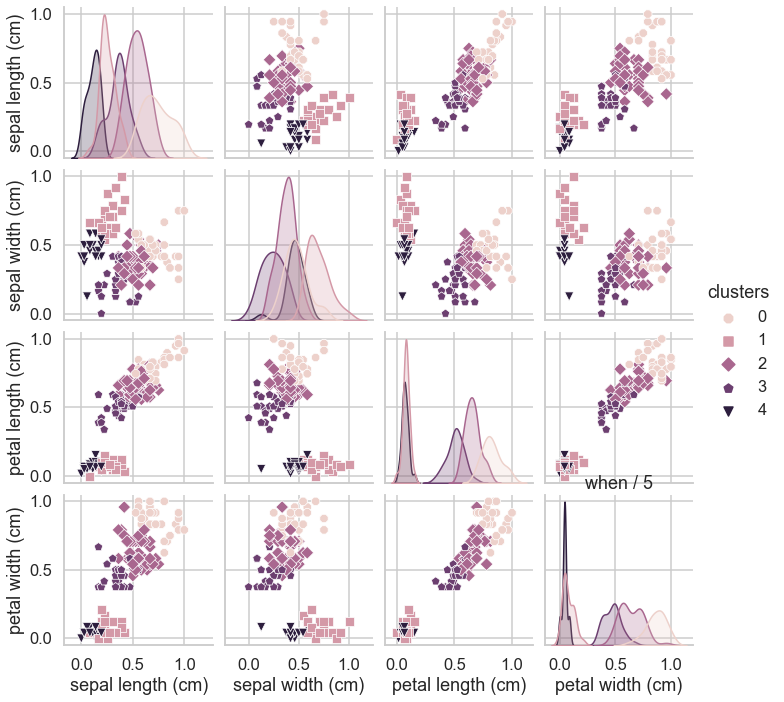

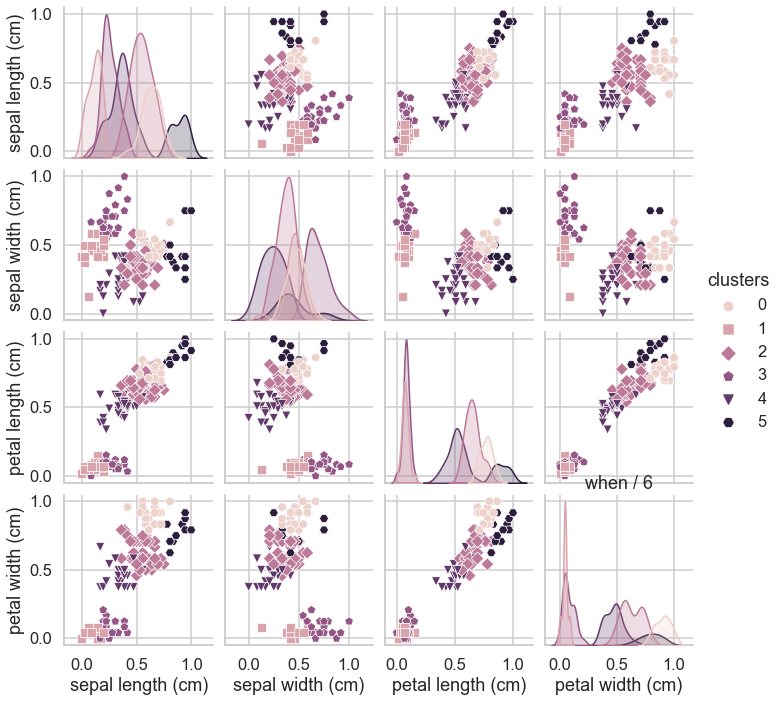

In [651]:
sil = []
k=[2,3,4,5,6]
for item in k :
    sil.append(kmeans_multi(item,iris_data_df_norm))

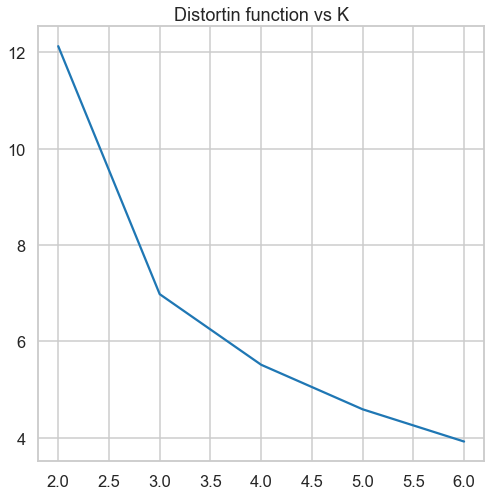

In [652]:
distortion_function(k,iris_data_df_norm)
# goes for 3

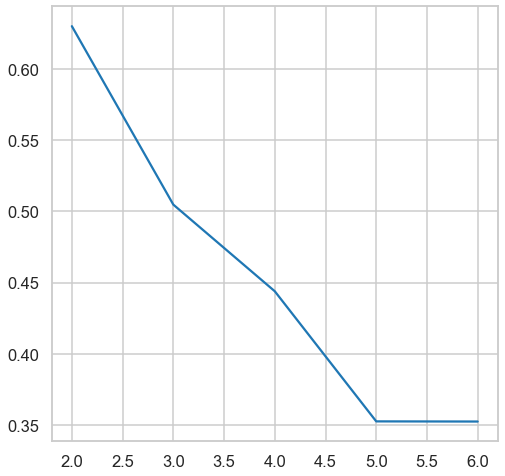

In [653]:
plt.plot(k,sil)

In [658]:
# although silhouette_score of k = 3 is not the highest value for silhouette score of different k but it is a good indicating number for a good choice of clustering as for prior knowlege while highest is k = 2
iris_norm_best_silhouette_scores.append(sil[k.index(3)])
iris_norm_best_references.append(3)

### heirarichal

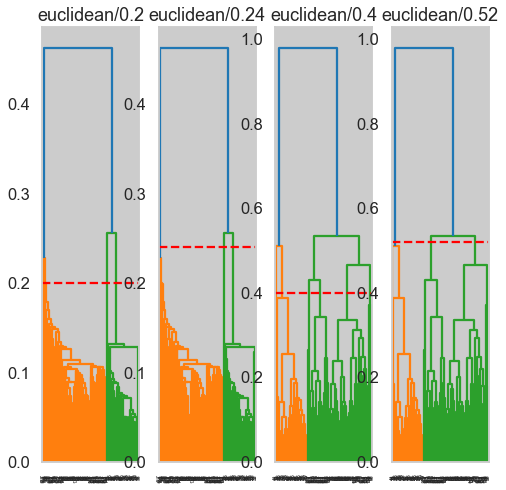

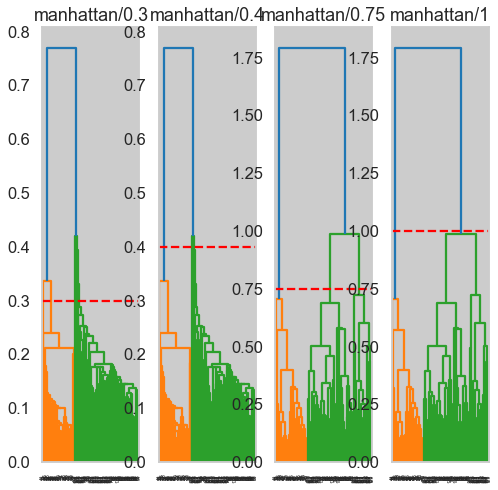

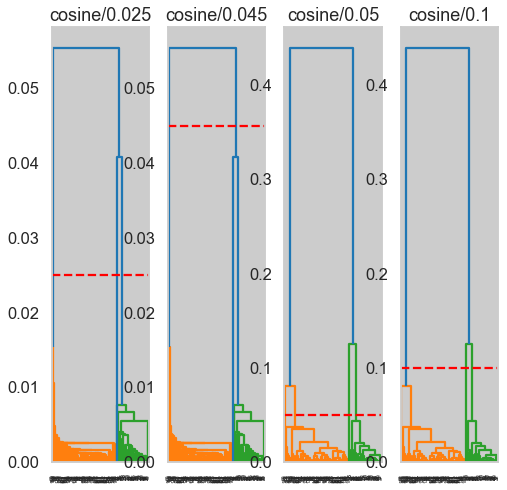

In [665]:
affinity = ['euclidean' , 'manhattan' ,'cosine']
linkage = ['single','average']
threshold =[]
h_silhouette_scores = []
h_silhouette_scores_reference = []
labels=[]
for aff in affinity :
    plt.figure()
    l=1
    for link in linkage :
        plt.subplot(140+l)
        if (aff=='manhattan'):
            if (link == 'single'):
                threshold=[0.3,0.4]
            else :
                threshold=[0.75,1]
            for thre in  threshold :
                plt.subplot(140+l)
                dendrogram , cluster , clustering , silhouette =hierarchal_clustering(iris_data_df_norm,link,'cityblock',thre,aff)
                h_silhouette_scores.append(silhouette)
                h_silhouette_scores_reference.append(aff+'/'+link+'/'+str(thre) +'/'+ str(len(np.unique(clustering))))
                labels.append(clustering)
                l=l+1
        else :   
            if (aff=='euclidean'):
                if (link == 'single'):
                    threshold=[0.2,0.24]
                else :
                    threshold=[0.4,0.52]
            if (aff=='cosine'):
                if (link == 'single'):
                    threshold=[0.025,0.045]
                else :
                    threshold=[0.05,0.1]
            for thre in  threshold : 
                plt.subplot(140+l)
                dendrogram , cluster , clustering , silhouette =hierarchal_clustering(iris_data_df_norm,link,aff,thre,aff)
                h_silhouette_scores.append(silhouette)
                h_silhouette_scores_reference.append(aff+'/'+link+'/'+str(thre)+'/'+str(len(np.unique(clustering))))
                labels.append(clustering)
                l=l+1

In [666]:
h_silhouette_scores

[0.38970438475262115,
 0.5323532834969982,
 0.34632863095615274,
 0.5047999262278894,
 0.16187293180736698,
 0.4855660524189197,
 0.5023126876272325,
 0.6300471284354711,
 0.5323532834969982,
 0.6300471284354711,
 0.37536993546163666,
 0.5323532834969982]

In [669]:
h_silhouette_scores_reference

['euclidean/single/0.2/4',
 'euclidean/single/0.24/3',
 'euclidean/average/0.4/6',
 'euclidean/average/0.52/3',
 'manhattan/single/0.3/6',
 'manhattan/single/0.4/3',
 'manhattan/average/0.75/3',
 'manhattan/average/1/2',
 'cosine/single/0.025/3',
 'cosine/single/0.045/2',
 'cosine/average/0.05/4',
 'cosine/average/0.1/3']

Text(0.5, 1.0, 'euclidean/single/0.24/3')

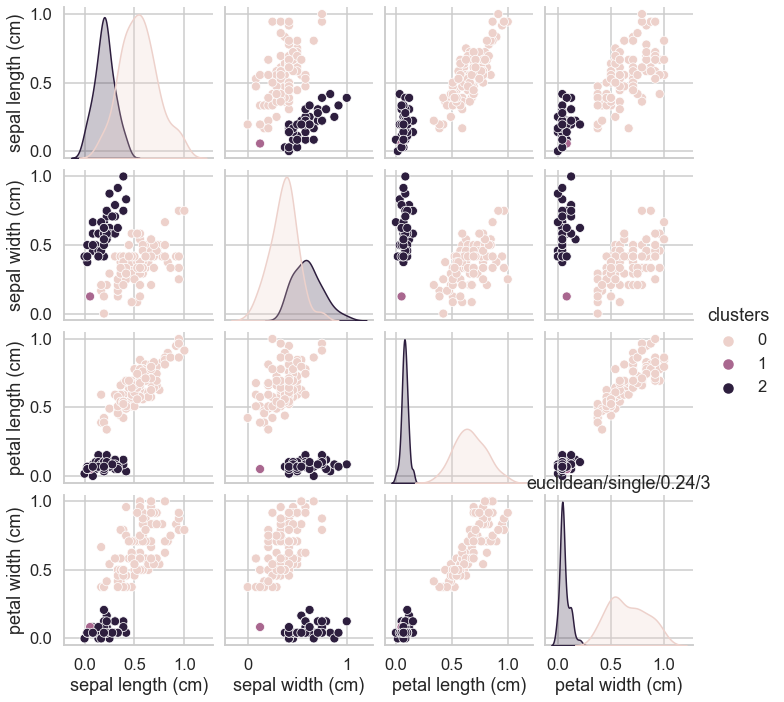

In [670]:
#we can see that highest silhouette_score was for:  'euclidean/single/0.24/3' and common used

# index 1
# so we will plot pairplot in these cases to better see result
h_df =  iris_data_df_norm.copy()
h_df['clusters']=labels[1]
sns.pairplot(h_df, hue='clusters',  vars=h_df.columns[0:4] , height=2.5)
plt.title(h_silhouette_scores_reference[1])

In [671]:
iris_norm_best_silhouette_scores.append(h_silhouette_scores[1])
iris_norm_best_references.append(h_silhouette_scores_reference[1])

### DBscan

In [678]:
db_cases_norm , db_silhouette_scores_norm = db_m(iris_data_df_normo)

one cluster
one cluster
one cluster
one cluster
one cluster


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

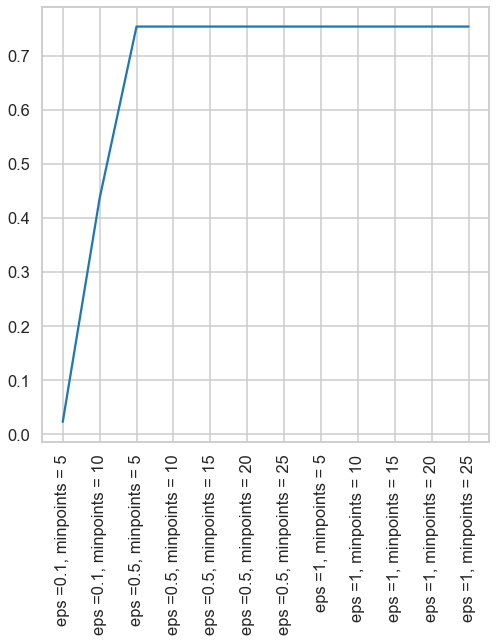

In [679]:
plt.plot(db_cases_norm,db_silhouette_scores_norm)
plt.xticks(rotation=90)

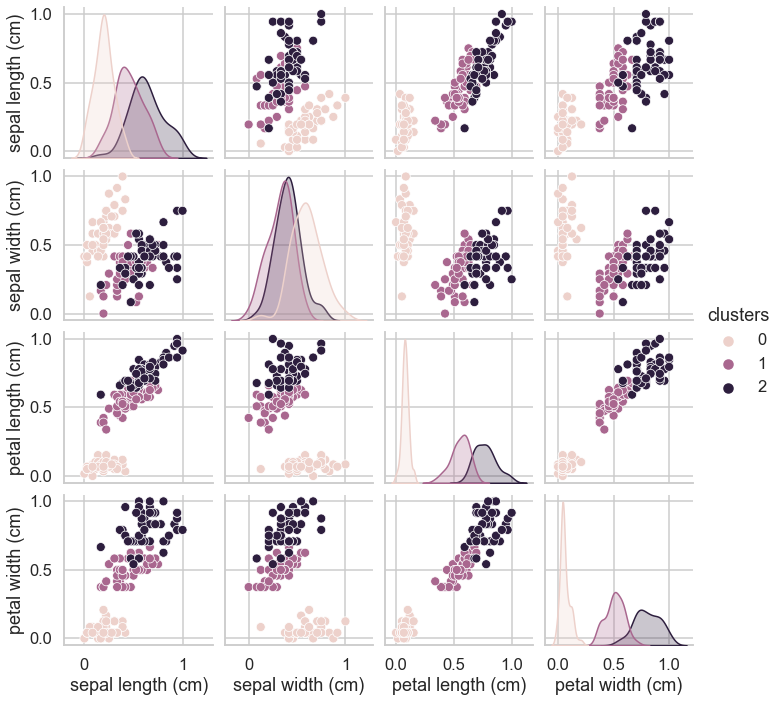

In [681]:
#high silhouette_score is where eps = 1 and minpoints are 5 then the pairplot is and it's 3 clusters !
num_of_clusters , clusters , silhouette1  = db(iris_data_df_normo,1, 5)
db_df_norm =  iris_data_df_norm
db_df_norm['clusters']=clusters
sns.pairplot(db_df_norm, hue='clusters',  vars=db_df_norm.columns[0:4] , height=2.5)

In [684]:
iris_norm_best_silhouette_scores.append(silhouette1)
iris_norm_best_references.append("eps = 1 , minpoints = 5")

### GMM

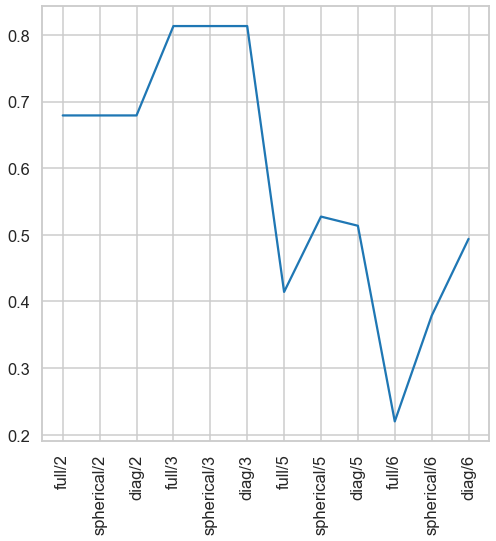

In [272]:
gmm_m(iris_data_df_norm)    

In [688]:
# as we can see highest silhouette score is when clusters are 3 with any covariance type : select full covariance type
hard_clusters = gmm(iris_data_df_norm,3,'full')

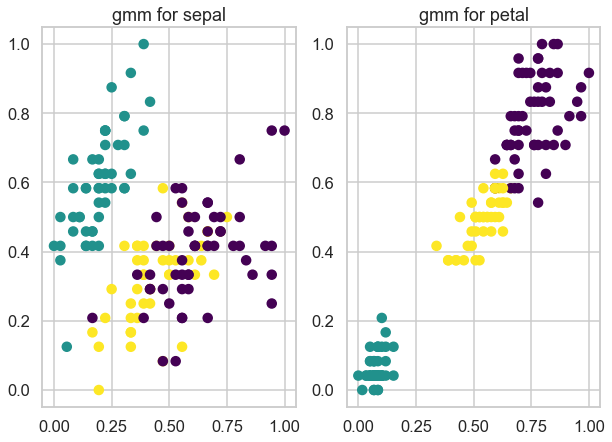

In [689]:
plt.figure(figsize=(10, 7))
plt.subplot(1,2,1)
plt.title('gmm for sepal')
plt.scatter(iris_data_df_norm['sepal length (cm)'],iris_data_df_norm['sepal width (cm)'],c=hard_clusters , cmap='viridis' , zorder=2)
plt.subplot(1,2,2)
plt.title('gmm for petal')
plt.scatter(iris_data_df_norm['petal length (cm)'],iris_data_df_norm['petal width (cm)'],c=hard_clusters , cmap='viridis' , zorder=2)

In [690]:
best_silhouette_gmm_norm =silhouette_score(iris_data_df_norm, hard_clusters)
best_silhouette_gmm_norm

0.451231371363891

In [691]:
iris_norm_best_silhouette_scores.append(best_silhouette_gmm_norm)
iris_norm_best_references.append("full/3")

In [693]:
max(iris_norm_best_silhouette_scores)

0.7538039794003278

In [694]:
iris_norm_best_references[iris_norm_best_silhouette_scores.index(max(iris_norm_best_silhouette_scores))]

'full/3'

After Normalizing iris data : 
we can see that the max silhouette score increased to be 0.7538039794003278 by gmm 

## Customer dataset
Repeat all the above on the customer data set 

### 1- Load dataset

In [695]:
customer_dataset_df = pd.read_csv('Customer data.csv' , index_col=0)
customer_dataset_df.describe()

Sex  Marital status          Age   Education         Income  \
count  2000.000000     2000.000000  2000.000000  2000.00000    2000.000000   
mean      0.457000        0.496500    35.909000     1.03800  120954.419000   
std       0.498272        0.500113    11.719402     0.59978   38108.824679   
min       0.000000        0.000000    18.000000     0.00000   35832.000000   
25%       0.000000        0.000000    27.000000     1.00000   97663.250000   
50%       0.000000        0.000000    33.000000     1.00000  115548.500000   
75%       1.000000        1.000000    42.000000     1.00000  138072.250000   
max       1.000000        1.000000    76.000000     3.00000  309364.000000   

        Occupation  Settlement size  
count  2000.000000      2000.000000  
mean      0.810500         0.739000  
std       0.638587         0.812533  
min       0.000000         0.000000  
25%       0.000000         0.000000  
50%       1.000000         1.000000  
75%       1.000000         1.000000  
max       2.000000         2.000000

In [696]:
# data need to be normalizes to be on same scale 

### 2- mean centering

In [697]:
# Subtract mean from data
mean = np.mean(customer_dataset_df, axis= 0)
print("Mean ", mean)
customer_dataset_df_cen = customer_dataset_df - mean
print("Data after subtracting mean ", customer_dataset_df.shape, "\n")

Mean  Sex                     0.4570
Marital status          0.4965
Age                    35.9090
Education               1.0380
Income             120954.4190
Occupation              0.8105
Settlement size         0.7390
dtype: float64
Data after subtracting mean  (2000, 7) 



In [698]:
customer_dataset_df_cen.describe()

Sex  Marital status           Age     Education        Income  \
count  2.000000e+03    2.000000e+03  2.000000e+03  2.000000e+03  2.000000e+03   
mean   3.757050e-15    4.249934e-16 -2.877343e-14  2.087552e-15  2.086163e-10   
std    4.982722e-01    5.001128e-01  1.171940e+01  5.997798e-01  3.810882e+04   
min   -4.570000e-01   -4.965000e-01 -1.790900e+01 -1.038000e+00 -8.512242e+04   
25%   -4.570000e-01   -4.965000e-01 -8.909000e+00 -3.800000e-02 -2.329117e+04   
50%   -4.570000e-01   -4.965000e-01 -2.909000e+00 -3.800000e-02 -5.405919e+03   
75%    5.430000e-01    5.035000e-01  6.091000e+00 -3.800000e-02  1.711783e+04   
max    5.430000e-01    5.035000e-01  4.009100e+01  1.962000e+00  1.884096e+05   

         Occupation  Settlement size  
count  2.000000e+03     2.000000e+03  
mean   1.955658e-15     5.024758e-15  
std    6.385872e-01     8.125325e-01  
min   -8.105000e-01    -7.390000e-01  
25%   -8.105000e-01    -7.390000e-01  
50%    1.895000e-01     2.610000e-01  
75%    1.895000e-01     2.610000e-01  
max    1.189500e+00     1.261000e+00

### 3- Standardization

In [699]:
customer_dataset_np_cen_std = StandardScaler().fit_transform(customer_dataset_df_cen)

In [700]:
customer_dataset_df_cen_std = pd.DataFrame(data= customer_dataset_np_cen_std,
                     columns= customer_dataset_df.columns)

In [701]:
customer_dataset_df_cen_std.describe()

Sex  Marital status           Age     Education        Income  \
count  2.000000e+03    2.000000e+03  2.000000e+03  2.000000e+03  2.000000e+03   
mean   3.554712e-15    5.950795e-16  4.435341e-17 -6.123990e-16 -7.327472e-18   
std    1.000250e+00    1.000250e+00  1.000250e+00  1.000250e+00  1.000250e+00   
min   -9.173988e-01   -9.930243e-01 -1.528532e+00 -1.731068e+00 -2.234225e+00   
25%   -9.173988e-01   -9.930243e-01 -7.603825e-01 -6.337243e-02 -6.113281e-01   
50%   -9.173988e-01   -9.930243e-01 -2.482829e-01 -6.337243e-02 -1.418903e-01   
75%    1.090038e+00    1.007025e+00  5.198664e-01 -6.337243e-02  4.492952e-01   
max    1.090038e+00    1.007025e+00  3.421764e+00  3.272018e+00  4.945225e+00   

         Occupation  Settlement size  
count  2.000000e+03     2.000000e+03  
mean   2.617018e-15    -4.455103e-15  
std    1.000250e+00     1.000250e+00  
min   -1.269525e+00    -9.097295e-01  
25%   -1.269525e+00    -9.097295e-01  
50%    2.968230e-01     3.212982e-01  
75%    2.968230e-01     3.212982e-01  
max    1.863171e+00     1.552326e+00

### 4- covariance metrix

In [702]:
#cov = np.cov(customer_dataset_df_cen_std.T)
#cov = np.round(cov, 2)

### 5- SVD to calculate eigen vectors matrix U

In [703]:
# Perform eigen decomposition of covariance matrix
# eig_val, eig_vec = np.linalg.eig(cov)
# print("Eigen vectors ", eig_vec)
# print("Eigen values ", eig_val, "\n")

### Perform PCA

In [704]:
pca = PCA()
pca.fit(customer_dataset_df_cen_std)
customer_dataset_pca = pca.transform(customer_dataset_df_cen_std)


In [705]:
# to choose which k component to use :
# calculate percentage of variation of each pc
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
per_var

array([35.7, 26.3, 18.8,  7.6,  5.7,  4. ,  2. ])

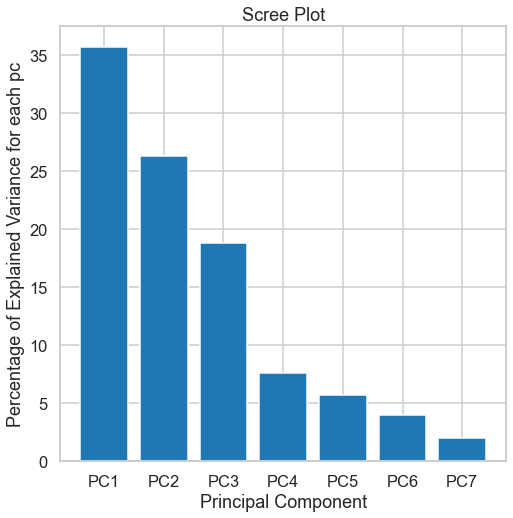

In [706]:
# to visualize precentages : Scree plot is used
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance for each pc')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [288]:
# PC1 , 2 , 3 Represent more than 80% of the original data, so they should do good job representing it

In [707]:
customer_dataset_pca_df = pd.DataFrame(data= customer_dataset_pca, index=customer_dataset_df.index, columns=labels)
customer_dataset_pca_df

PC1       PC2       PC3       PC4       PC5       PC6  \
ID                                                                      
100000001  2.514746  0.834122  2.174806  1.217794 -0.677176 -0.472056   
100000002  0.344935  0.598146 -2.211603  0.548385 -0.706269  0.703638   
100000003 -0.651063 -0.680093  2.280419  0.120675  0.166480  0.049468   
100000004  1.714316 -0.579927  0.730731 -0.510753  0.044448  0.563451   
100000005  1.626745 -0.440496  1.244909 -0.231808 -0.094499  0.103431   
...             ...       ...       ...       ...       ...       ...   
100001996 -0.866034  0.298330  1.438958 -0.945916 -1.159023  0.560826   
100001997 -1.114957  0.794727 -1.079871 -0.736766  0.264667 -0.229442   
100001998 -1.452298 -2.235937  0.896571 -0.131774  0.190536  0.344249   
100001999 -2.241453  0.627108 -0.530456 -0.042606  0.048526  0.562745   
100002000 -1.866885 -2.454672  0.662622  0.100896  0.222513  0.082380   

                PC7  
ID                   
100000001 -0.191457  
100000002  0.251703  
100000003 -0.286729  
100000004 -0.015546  
100000005 -0.480099  
...             ...  
100001996 -0.236646  
100001997 -0.030549  
100001998 -0.420874  
100001999  0.152089  
100002000 -0.126145  

[2000 rows x 7 columns]

In [708]:
customer_dataset_pca_df_reduced = customer_dataset_pca_df[customer_dataset_pca_df.columns[0:3]]

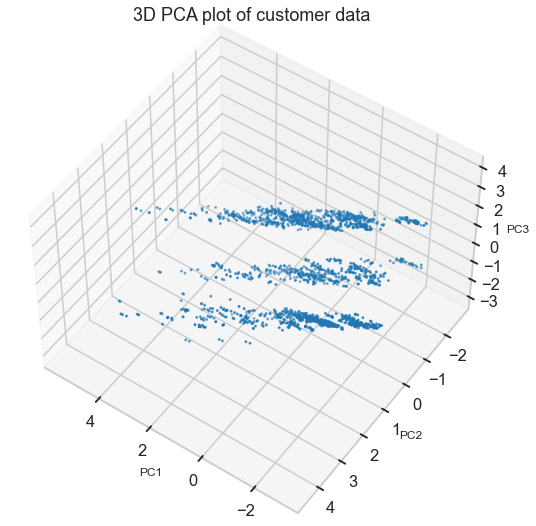

In [709]:
fig = plt.figure(figsize=(14,9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(customer_dataset_pca_df_reduced.PC1, 
            customer_dataset_pca_df_reduced.PC2, 
            customer_dataset_pca_df_reduced.PC3, 
            s=2)
ax.set_xlabel("PC1", 
              fontsize=12)
ax.set_ylabel("PC2", 
              fontsize=12)
ax.set_zlabel("PC3", 
              fontsize=12)
 
ax.view_init(50, 125)
plt.title("3D PCA plot of customer data")
plt.show()


## Clustering data

### visualisation function for 3D data with clusters

In [710]:
def customer_vis_3D_clustering(labels):
    # Axis assignment
    Xax = customer_dataset_pca[:,0]
    Yax = customer_dataset_pca[:,1]
    Zax = customer_dataset_pca[:,2]
    #plot
    fig = plt.figure(figsize=(14,9))
    # different angles
    for i in range (1,4) :
        ax = fig.add_subplot(130+i, 
                     projection='3d')
        ax.scatter(Xax, 
            Yax, 
            Zax, 
            c=labels,
            cmap='viridis',
            zorder=2,
            s=5)   
        ax.set_xlabel("PC1", fontsize=12)
        ax.set_ylabel("PC2", fontsize=12)
        ax.set_zlabel("PC3", fontsize=12)
        ax.view_init(30*i, 125)
    plt.title("3D PCA plot of customer data")
    plt.show()
    

In [711]:
customer_dataset_pca_df_reduced

PC1       PC2       PC3
ID                                     
100000001  2.514746  0.834122  2.174806
100000002  0.344935  0.598146 -2.211603
100000003 -0.651063 -0.680093  2.280419
100000004  1.714316 -0.579927  0.730731
100000005  1.626745 -0.440496  1.244909
...             ...       ...       ...
100001996 -0.866034  0.298330  1.438958
100001997 -1.114957  0.794727 -1.079871
100001998 -1.452298 -2.235937  0.896571
100001999 -2.241453  0.627108 -0.530456
100002000 -1.866885 -2.454672  0.662622

[2000 rows x 3 columns]

In [712]:
customer_best_silhouette_scores=[]
customer_best_references=[]

### 1- k-means

In [713]:
def kmeans_multi2(k,df):
    m = ["8","s","D","p", "v" , "H", "v", "^" ]
    Kmeans_model = KMeans(n_clusters=k, random_state=10)
    Kmeans_model_labels=Kmeans_model.fit_predict(df)
    Kmeans_model_df = df.copy()
    Kmeans_model_df['clusters']=Kmeans_model_labels
    sns.pairplot(Kmeans_model_df, hue='clusters',  vars=Kmeans_model_df.columns[0:3] , height=2.5, markers = m[0:k] )
    plt.title('when / ' + str(k) )
    return Kmeans_model_labels , silhouette_score(df,Kmeans_model_labels)

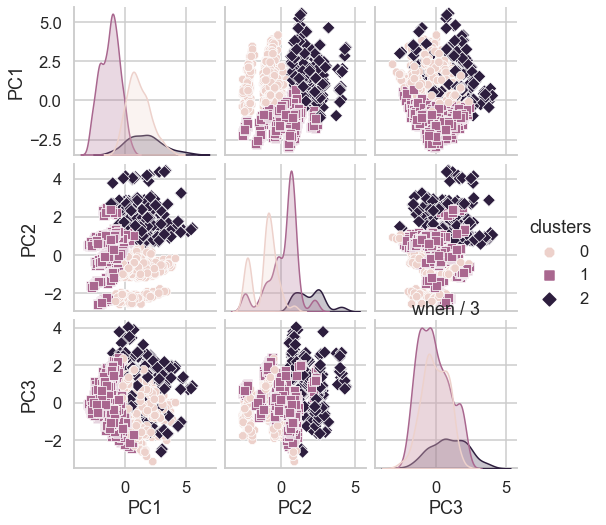

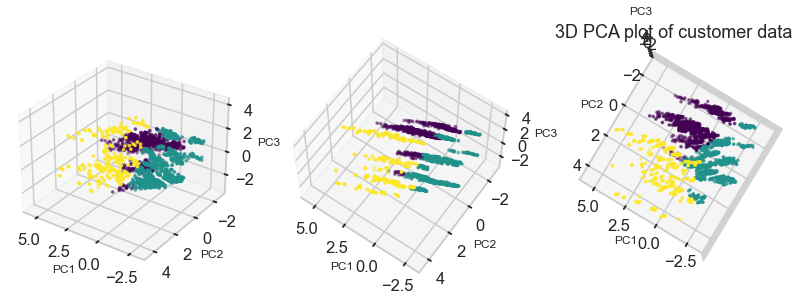

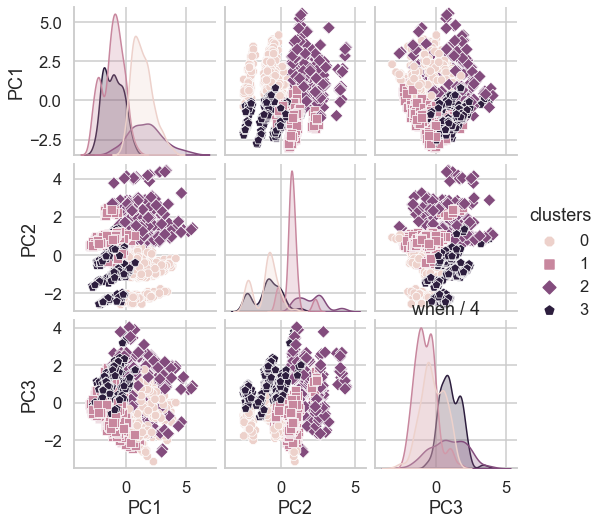

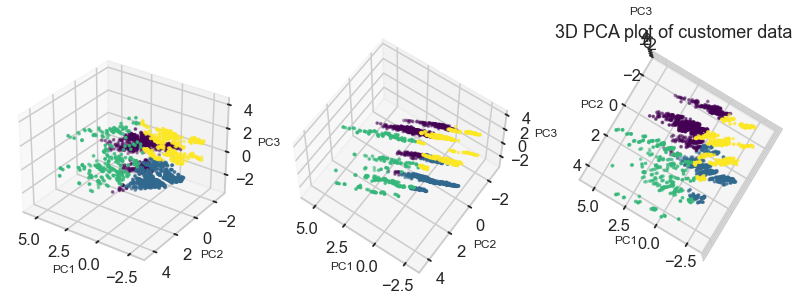

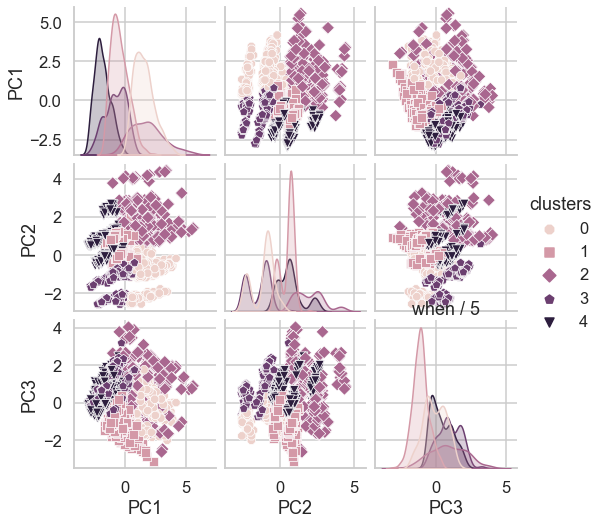

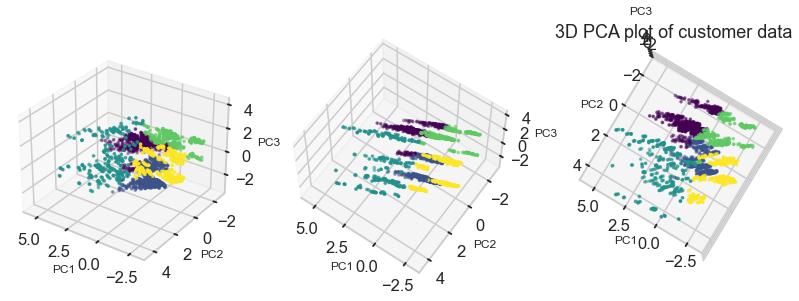

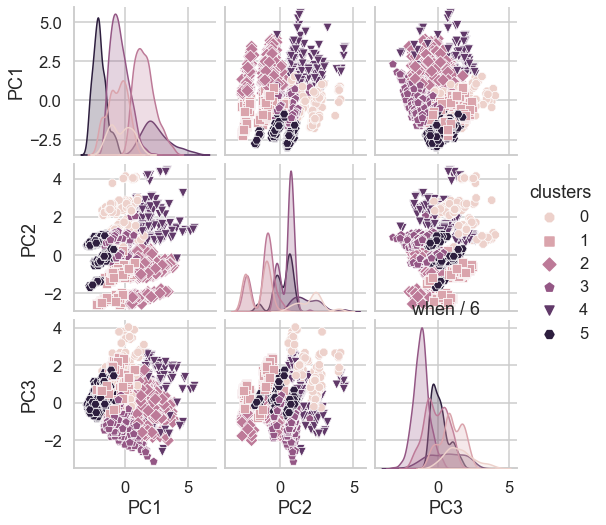

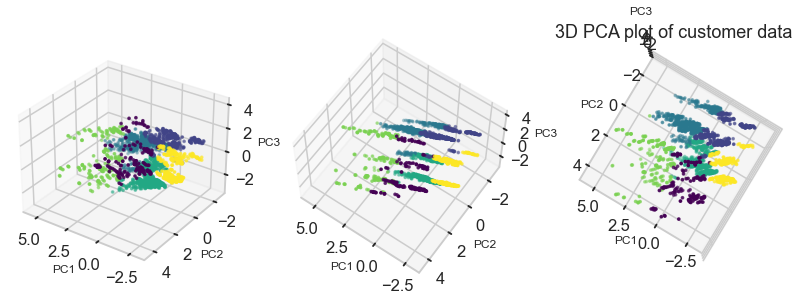

In [714]:
k = [3, 4 , 5 , 6]
customer_silhouette_scores_kmeans = []
for i in k :
    customer_labels_kmeans , customer_silhouette_score_kmeans  = kmeans_multi2(i,customer_dataset_pca_df_reduced)
    customer_vis_3D_clustering(customer_labels_kmeans)
    customer_silhouette_scores_kmeans.append(customer_silhouette_score_kmeans)
    

In [715]:
best_customer_silhouette_score_kmeans = max(customer_silhouette_scores_kmeans)

In [716]:
# when k = 6
k[customer_silhouette_scores_kmeans.index(best_customer_silhouette_score_kmeans)]

6

In [717]:
customer_best_silhouette_scores.append(best_customer_silhouette_score_kmeans)
customer_best_references.append(k[customer_silhouette_scores_kmeans.index(best_customer_silhouette_score_kmeans)])

### 2- heirarical

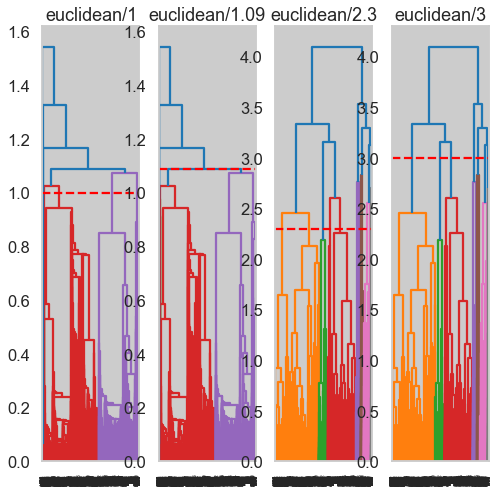

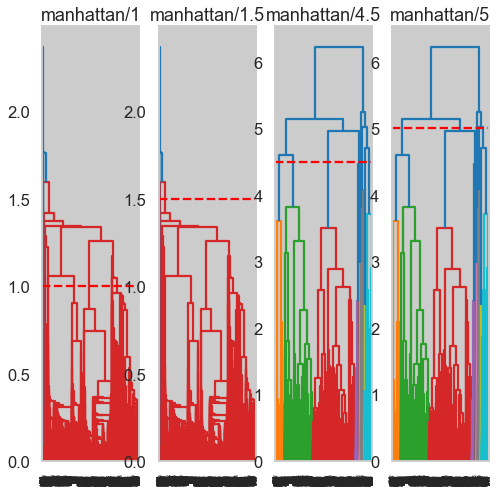

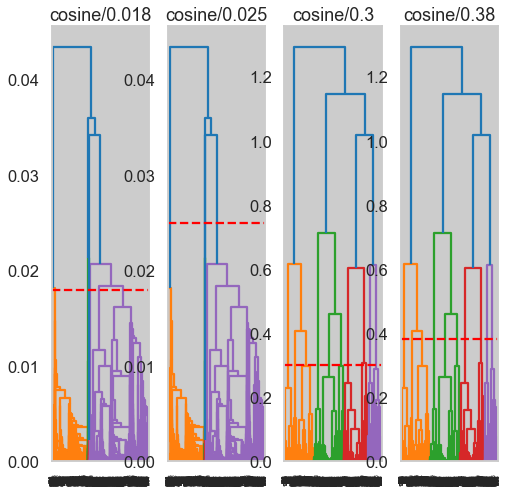

In [718]:
affinity = ['euclidean' , 'manhattan' ,'cosine']
linkage = ['single','average']
threshold =[]
customer_silhouette_scores_h = []
customer_silhouette_scores_reference_h = []
labels=[]
for aff in affinity :
    plt.figure()
    l=1
    for link in linkage :
        plt.subplot(140+l)
        if (aff=='manhattan'):
            if (link == 'single'):
                threshold=[1,1.5]
            else :
                threshold=[4.5,5]
            for thre in  threshold :
                plt.subplot(140+l)
                dendrogram , cluster , clustering , silhouette =hierarchal_clustering(customer_dataset_pca_df_reduced,link,'cityblock',thre,aff)
                customer_silhouette_scores_h.append(silhouette)
                customer_silhouette_scores_reference_h.append(aff+'/'+link+'/'+str(thre) +'/'+ str(len(np.unique(clustering))))
                labels.append(clustering)
                l=l+1
        else :   
            if (aff=='euclidean'):
                if (link == 'single'):
                    threshold=[1,1.09]
                else :
                    threshold=[2.3,3]
            if (aff=='cosine'):
                if (link == 'single'):
                    threshold=[0.018,0.025]
                else :
                    threshold=[0.3,0.38]
            for thre in  threshold : 
                plt.subplot(140+l)
                dendrogram , cluster , clustering , silhouette =hierarchal_clustering(customer_dataset_pca_df_reduced,link,aff,thre,aff)
                customer_silhouette_scores_h.append(silhouette)
                customer_silhouette_scores_reference_h.append(aff+'/'+link+'/'+str(thre)+'/'+str(len(np.unique(clustering))))
                labels.append(clustering)
                l=l+1

In [719]:
best_customer_silhouette_score_h = max(customer_silhouette_scores_h)
best_customer_silhouette_score_h

0.3682842649196997

In [720]:
# when k = 10
len(np.unique(labels[customer_silhouette_scores_h.index(best_customer_silhouette_score_h)]))

10

In [721]:
# when average linkage with manhatten distance is used and 5 as threshold
customer_silhouette_scores_reference_h[customer_silhouette_scores_h.index(best_customer_silhouette_score_h)]

'cosine/average/0.38/10'

In [722]:
customer_best_silhouette_scores.append(best_customer_silhouette_score_h)
customer_best_references.append(customer_silhouette_scores_reference_h[customer_silhouette_scores_h.index(best_customer_silhouette_score_h)])

### 3- DBscan

In [726]:
def db_3d(df,epsilon, minpoints):
    dbscan = DBSCAN(eps=epsilon,min_samples=minpoints)
    clusters=dbscan.fit_predict(df)
    silhouette=silhouette_score(df, clusters)
    return  len(np.unique(clusters)) , clusters , silhouette 

In [727]:
def db_m_3d(df):
    eps= [0.1,0.5,1,1.5,2,2.5,3]
    minpoints = [5,10,15,20,25]
    labels=[]
    silhouette_scores =[]
    cases=[]
    for i in eps :
        l=1
        for j in minpoints :
            try :
                num_of_clusters , clusters , silhouette  = db(df,i, j)
                silhouette_scores.append(silhouette)
                cases.append("eps =" + str(i) + ", minpoints = " + str(j))
                labels.append(clusters)
                l=l+1
            except : 
                break
    return labels , cases , silhouette_scores

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

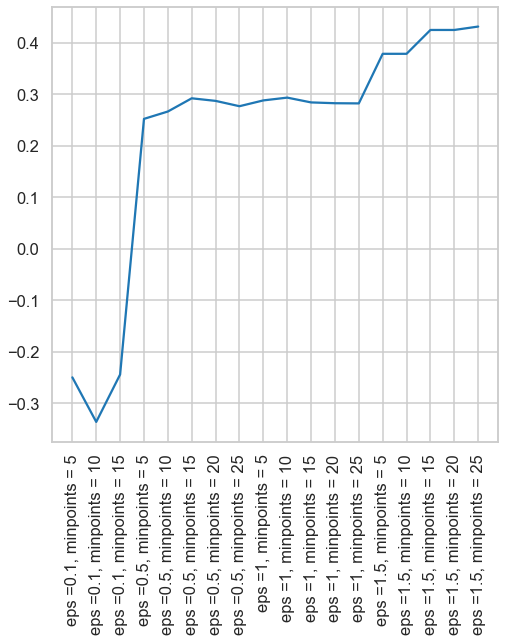

In [728]:
customer_db_labels , customer_db_cases , customer__silhouette_scores_db = db_m_3d(customer_dataset_pca_df_reduced)
plt.plot(customer_db_cases,customer__silhouette_scores_db)
plt.xticks(rotation=90)

In [729]:
best_customer_silhouette_score_db = max(customer__silhouette_scores_db)
best_customer_silhouette_score_db

0.4311845326583232

In [730]:
# when k = 2
len(np.unique(customer_db_labels[customer__silhouette_scores_db.index(best_customer_silhouette_score_db)]))

2

In [731]:
# when eps = 1.5 & minpoints = 25
customer_db_cases[customer__silhouette_scores_db.index(best_customer_silhouette_score_db)]

'eps =1.5, minpoints = 25'

In [732]:
customer_db_labels

[array([-1, -1,  0, ..., -1, 14, 12], dtype=int64),
 array([-1, -1, -1, ..., -1, -1,  4], dtype=int64),
 array([-1, -1, -1, ..., -1, -1,  1], dtype=int64),
 array([0, 1, 2, ..., 6, 5, 6], dtype=int64),
 array([0, 1, 2, ..., 5, 4, 5], dtype=int64),
 array([9, 0, 1, ..., 6, 3, 6], dtype=int64),
 array([8, 0, 1, ..., 6, 3, 6], dtype=int64),
 array([-1,  1,  0, ...,  6,  2,  6], dtype=int64),
 array([0, 1, 2, ..., 2, 1, 2], dtype=int64),
 array([0, 1, 2, ..., 2, 1, 2], dtype=int64),
 array([0, 1, 2, ..., 2, 1, 2], dtype=int64),
 array([0, 1, 2, ..., 2, 1, 2], dtype=int64),
 array([0, 1, 2, ..., 2, 1, 2], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64)]

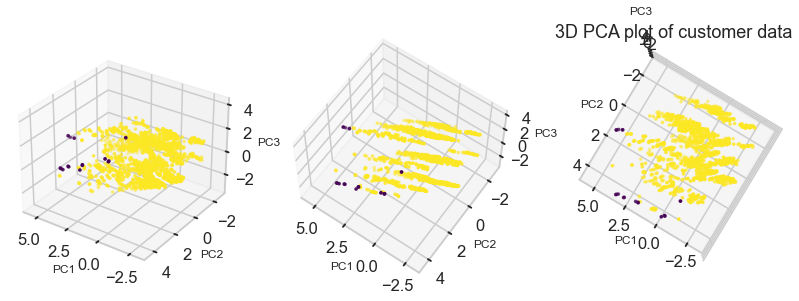

In [733]:
# visualizing clusters in this case
customer_vis_3D_clustering(customer_db_labels[customer__silhouette_scores_db.index(best_customer_silhouette_score_db)])

In [734]:
customer_best_silhouette_scores.append(best_customer_silhouette_score_db)
customer_best_references.append(customer_db_cases[customer__silhouette_scores_db.index(best_customer_silhouette_score_db)])

### 4- GMM

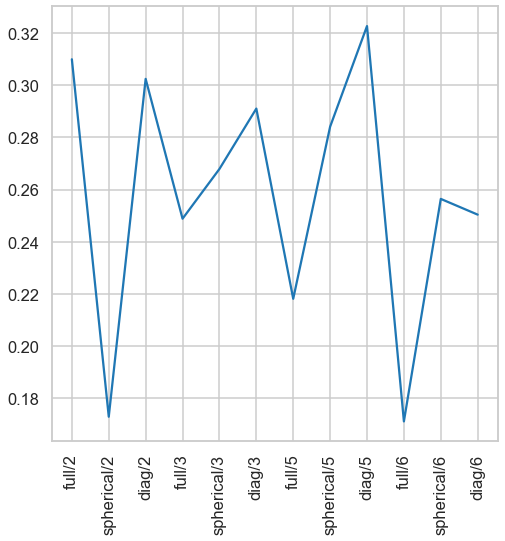

In [737]:
gmm_m(customer_dataset_pca_df_reduced)

In [738]:
# as we can see highest silhouette score is when clusters are 5 with covariance type diag
hard_clusters = gmm(customer_dataset_pca_df_reduced,5,'diag')

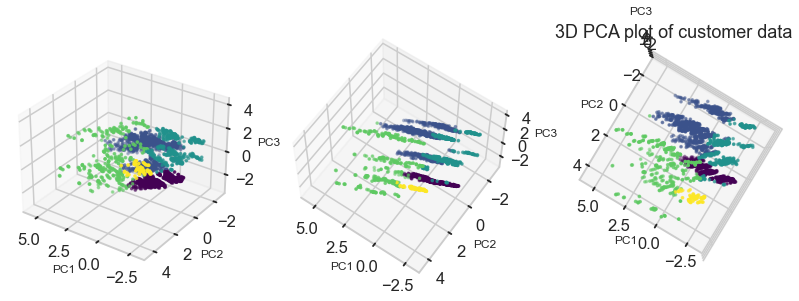

In [739]:
# visualizing clusters in this case
customer_vis_3D_clustering(hard_clusters)

In [740]:
customer_best_silhouette_scores.append(silhouette_score(customer_dataset_pca_df_reduced,hard_clusters))
customer_best_references.append('diag/5')

In [741]:
max(customer_best_silhouette_scores)

0.4311845326583232

In [742]:
customer_best_references[customer_best_silhouette_scores.index(max(customer_best_silhouette_scores))]

'eps =1.5, minpoints = 25'

we can see that the max silhouette score is 0.0.4311845326583232 by dbscan 